<a href="https://colab.research.google.com/github/andininur-pro/SD3203-Teknologi-Basis-Data/blob/main/121450147_Andini_Nur_Izzati_Prediksi_Harga_Nikel_(USD_LME)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References :
1. https://www.kaggle.com/code/kamyarazar/stock-price-prediction-lstm-hyperparameter-tuning (Stock Price Prediction LSTM Hyperparameter Tuning)
2. https://github.com/KianAnd19/rnn-time-series/blob/main/main.py (rnn-time-series)

[![Time series Analysis using LSTM,RNN ...](https://images.openai.com/thumbnails/eb919e8dc330252fefaa9a137e902a57.jpeg)](https://github.com/SheezaShabbir/Time-series-Analysis-using-LSTM-RNN-and-GRU)

Berikut adalah beberapa referensi repositori GitHub yang relevan untuk implementasi **Gated Recurrent Unit (GRU)** dalam peramalan deret waktu (time series) dengan teknik **Grid Search** untuk pemilihan hyperparameter:

---

### 1. **TriConvGRU: Kombinasi GRU dan CNN dengan Grid Search**

* **Deskripsi**: Repositori ini mengimplementasikan model GRU yang dipadukan dengan Convolutional Neural Network (CNN) untuk peramalan deret waktu. Grid search digunakan untuk memilih kombinasi terbaik dari jumlah unit tersembunyi pada GRU dan CNN serta laju pembelajaran yang optimal.
* **Link**: ([github.com][1])

---

### 2. **rnn-time-series: Analisis Perbandingan 3 Arsitektur RNN**

* **Deskripsi**: Repositori ini membandingkan tiga arsitektur RNN (GRU, LSTM, dan RNN standar) untuk peramalan deret waktu. Grid search diterapkan untuk menyetel parameter seperti ukuran input, ukuran tersembunyi, laju pembelajaran, dan jumlah epoch.
* **Link**: ([github.com][2])

---

### 3. **Time-Series-Neural-Network-Grid-Search: Grid Search untuk MLP**

* **Deskripsi**: Repositori ini fokus pada penerapan grid search untuk pemilihan hyperparameter dalam model Multi-Layer Perceptron (MLP) untuk peramalan deret waktu. Meskipun tidak secara eksplisit menggunakan GRU, teknik yang diterapkan dapat diadaptasi untuk model GRU.
* **Link**: ([github.com][3])

---

### 4. **Time-Series-Analysis-using-LSTM-RNN-and-GRU: Implementasi GRU dengan PyTorch**

* **Deskripsi**: Repositori ini menyediakan implementasi model GRU menggunakan PyTorch untuk peramalan deret waktu. Meskipun tidak secara eksplisit menggunakan grid search, kode ini dapat dimodifikasi untuk menyertakan teknik pencarian hyperparameter.
* **Link**: ([github.com][4])

---

### 5. **GRU-D: GRU untuk Deret Waktu dengan Nilai Hilang**

* **Deskripsi**: Repositori ini mengimplementasikan model GRU-D yang dirancang khusus untuk menangani deret waktu dengan nilai hilang. Meskipun tidak secara eksplisit menggunakan grid search, teknik yang diterapkan dapat diadaptasi untuk peramalan deret waktu dengan nilai hilang.
* **Link**: ([github.com][5])

---


[1]: https://github.com/behdad13/TriConvGRU?utm_source=chatgpt.com "behdad13/TriConvGRU: A Novel Time-series Forecasting ... - GitHub"
[2]: https://github.com/KianAnd19/rnn-time-series?utm_source=chatgpt.com "KianAnd19/rnn-time-series: A comparative analysis of 3 ... - GitHub"
[3]: https://github.com/DataCanvasIO/HyperTS?utm_source=chatgpt.com "DataCanvasIO/HyperTS: A Full-Pipeline Automated Time Series ..."
[4]: https://github.com/lucamainini/Multivariate-Time-Series-Forecasting?utm_source=chatgpt.com "lucamainini/Multivariate-Time-Series-Forecasting - GitHub"
[5]: https://github.com/dsgiitr/d2l-pytorch/blob/master/Ch10_Recurrent_Neural_Networks/Gated_Recurrent_Units.ipynb?utm_source=chatgpt.com "Gated Recurrent Units (GRU) - dsgiitr/d2l-pytorch - GitHub"


#Preprocess


## 1.Library yang digunakan

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

## 2.Load Data (import data)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Historis Nikel Berjangka USD (3).csv')
data

,Tanggal,Terakhir
0,30/12/2024,"15.450,00"
1,27/12/2024,"15.297,00"
2,24/12/2024,"15.455,00"
3,23/12/2024,"15.392,00"
4,20/12/2024,"15.302,00"
...,...,...
1164,7/1/2020,"13.935,00"
1165,6/1/2020,"13.820,00"
1166,3/1/2020,"13.755,00"
1167,2/1/2020,"14.260,00"


## 3.ubah variabel harga penutupan ke format float

In [4]:
data['Terakhir'] = data['Terakhir'].str.replace(',', '').astype(float)

In [5]:
data

,Tanggal,Terakhir
0,30/12/2024,15.450
1,27/12/2024,15.297
2,24/12/2024,15.455
3,23/12/2024,15.392
4,20/12/2024,15.302
...,...,...
1164,7/1/2020,13.935
1165,6/1/2020,13.820
1166,3/1/2020,13.755
1167,2/1/2020,14.260


## 4.Konversi Format Tanggal (date time)

In [6]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
data

<ipython-input-6-2065733134>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Tanggal'] = pd.to_datetime(data['Tanggal'])


,Tanggal,Terakhir
0,2024-12-30,15.450
1,2024-12-27,15.297
2,2024-12-24,15.455
3,2024-12-23,15.392
4,2024-12-20,15.302
...,...,...
1164,2020-01-07,13.935
1165,2020-01-06,13.820
1166,2020-01-03,13.755
1167,2020-01-02,14.260


In [7]:
# Buat range tanggal lengkap harian dari 2019-12-31 sampai 2024-12-31
full_dates = pd.date_range(start='2019-12-31', end='2024-12-31', freq='D')

In [8]:
# Set index menjadi tanggal agar bisa direindex
data = data.set_index('Tanggal').reindex(full_dates).rename_axis('Tanggal').reset_index()

In [9]:
data

,Tanggal,Terakhir
0,2019-12-31,14.025
1,2020-01-01,NaN
2,2020-01-02,14.260
3,2020-01-03,13.755
4,2020-01-04,NaN
...,...,...
1823,2024-12-27,15.297
1824,2024-12-28,NaN
1825,2024-12-29,NaN
1826,2024-12-30,15.450


#EDA

## 1.Statistik Data

In [10]:
data.describe()

,Tanggal,Terakhir
count,1828,1169.000000
mean,2022-07-01 12:00:00,18.758654
min,2019-12-31 00:00:00,10.880000
25%,2021-03-31 18:00:00,16.045030
50%,2022-07-01 12:00:00,17.999400
75%,2023-10-01 06:00:00,20.907500
max,2024-12-31 00:00:00,61.714400
std,NaN,4.662171


## 2.missing value

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Tanggal   1828 non-null   datetime64[ns]
 1   Terakhir  1169 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [12]:
# cek missing value
print("Jumlah missing value per kolom:")
print(data.isnull().sum())

Jumlah missing value per kolom:
Tanggal       0
Terakhir    659
dtype: int64


## 3.grafik data sebelum interpolasi

### a.grafik

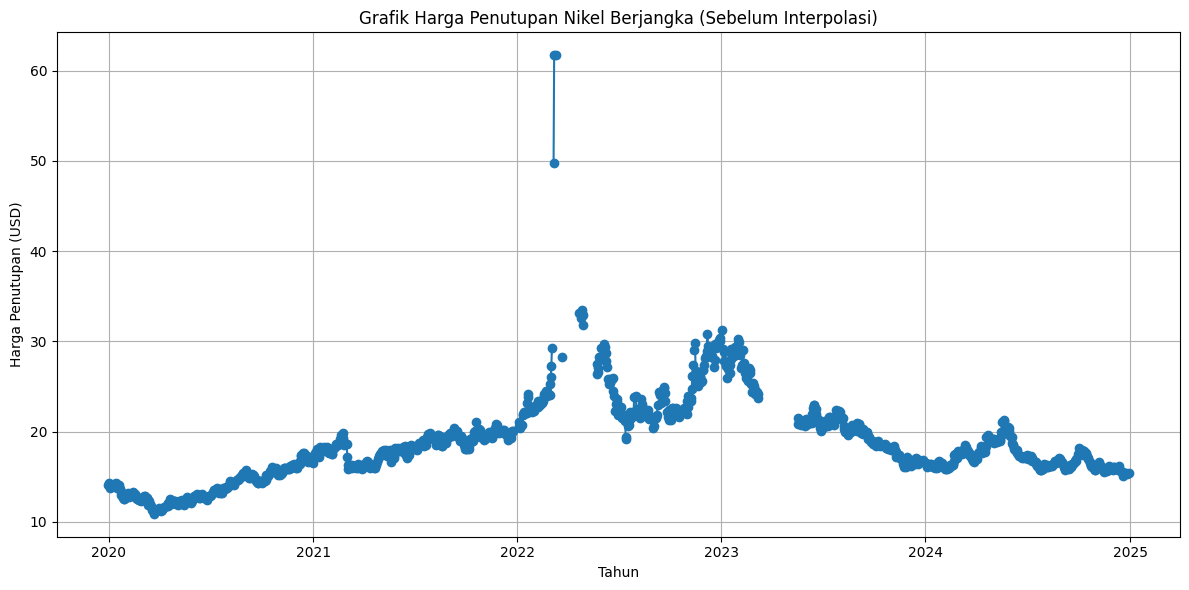

In [13]:
import matplotlib.pyplot as plt
# Visualisasi Data sebelum interpolasi
plt.figure(figsize=(12, 6))
plt.plot(data['Tanggal'], data['Terakhir'], marker='o', linestyle='-')
plt.title('Grafik Harga Penutupan Nikel Berjangka (Sebelum Interpolasi)')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### b.Line Chart

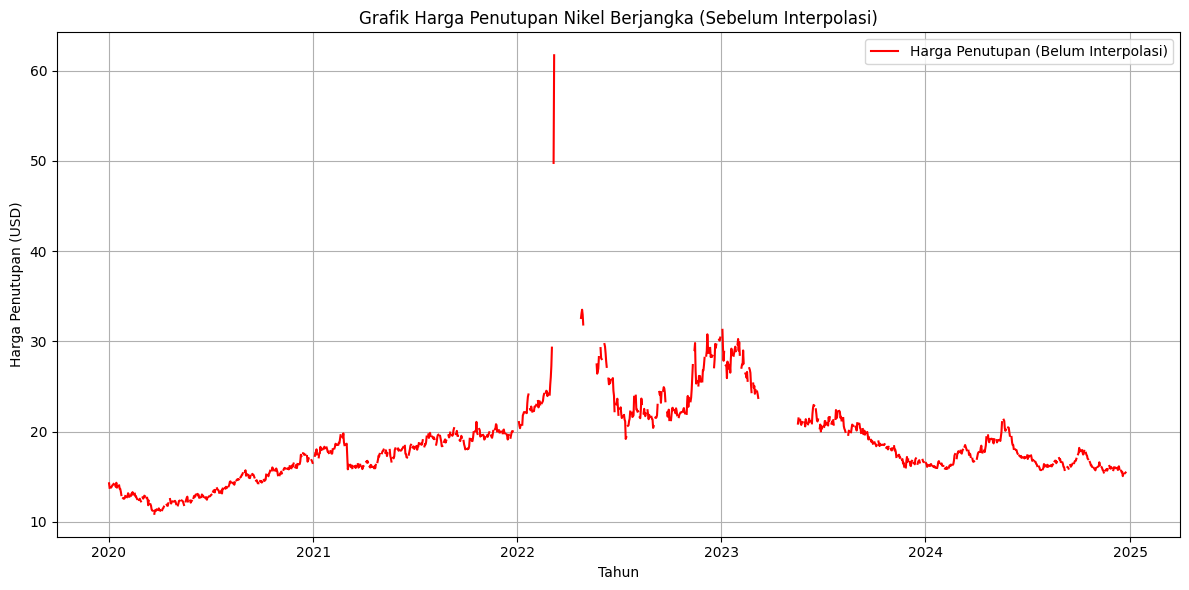

In [14]:
# prompt: tampilkan juga grafik dengan keterangan garis merupakan harga penutupan, belum dilakukan interpolasi linear, ganti garis warna merah

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['Tanggal'], data['Terakhir'], linestyle='-', color='red', label='Harga Penutupan (Belum Interpolasi)')
plt.title('Grafik Harga Penutupan Nikel Berjangka (Sebelum Interpolasi)')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### c.histogram

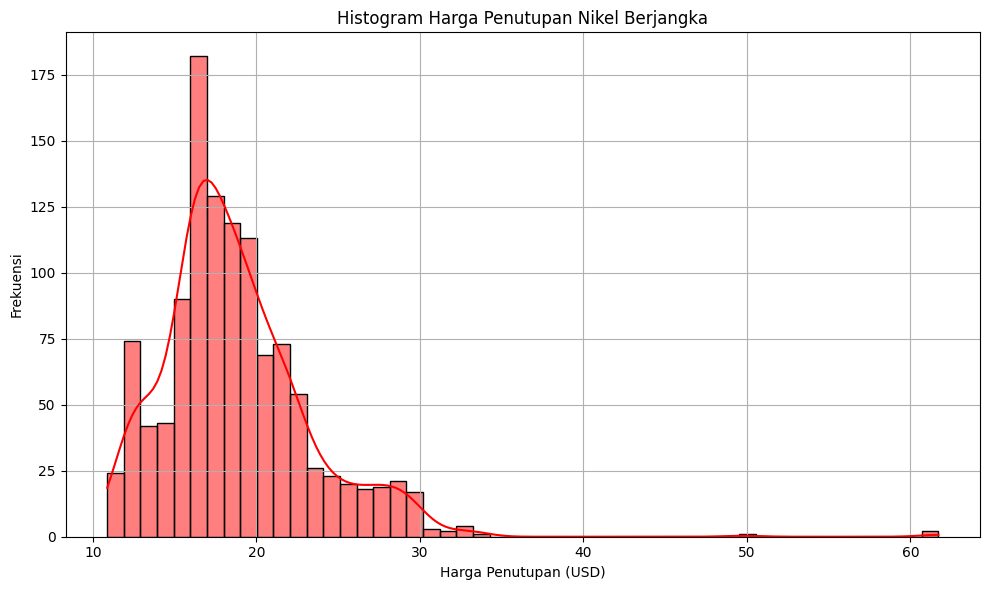

In [15]:
# prompt: buatkan histogram warna merah , dan jelaskan hasil histogram yang didapatkan

import matplotlib.pyplot as plt
# Buat histogram untuk kolom 'Terakhir'
plt.figure(figsize=(10, 6))
sns.histplot(data['Terakhir'], bins=50, kde=True, color='red')
plt.title('Histogram Harga Penutupan Nikel Berjangka')
plt.xlabel('Harga Penutupan (USD)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

Jika kamu mendapatkan histogram seperti gambar ini, maka berikut adalah **interpretasi statistik dan maknanya dalam konteks harga penutupan nikel berjangka**:

---

#### 📊 **Interpretasi Histogram Harga Penutupan Nikel:**

#### ✅ **1. Distribusi Positif Skew (Right-Skewed)**

* Grafik tampak **menumpuk di kiri (harga rendah)** dan **memanjang ke kanan (harga tinggi)**.
* Ini berarti:

  * **Mayoritas harga nikel berada di kisaran rendah** (sekitar 15–25 USD).
  * Ada **beberapa hari dengan harga yang sangat tinggi**, misalnya mendekati 60 USD, tapi **jarang terjadi**.
* **Distribusi ini tidak normal**, dan bisa memengaruhi performa model jika tidak dinormalisasi.

---

#### ✅ **2. Harga Paling Sering Muncul (Modus)**

* Terlihat puncak batang (frekuensi tertinggi) sekitar **17–18 USD**.
* Ini menunjukkan kisaran harga yang paling sering terjadi selama periode 2019–2024.

---

#### ✅ **3. Ada Outlier**

* Batang-batang tipis di kanan grafik (harga > 40 USD) menunjukkan adanya **outlier** atau harga ekstrem.
* Dalam prediksi time series, **outlier ini bisa berdampak besar**, terutama jika tidak ditangani dengan baik (misalnya dengan transformasi log atau robust scaler).

---

#### ✅ **4. Kurva Merah: KDE (Kernel Density Estimation)**

* Ini adalah bentuk smooth dari distribusi.
* Membantu melihat bentuk sebaran tanpa tergantung pada jumlah bin histogram.

---

### 📌 **Makna Praktis untuk Penelitian Kamu:**

* **Distribusi ini mendukung keputusan normalisasi Min-Max** sebelum melatih model GRU.
* Karena data tidak normal dan memiliki skew yang tajam, maka model RNN seperti GRU **berisiko mengalami vanishing gradient** tanpa normalisasi.
* Kamu bisa menyisipkan analisis ini ke dalam **Bab 4.1 Deskripsi Data**, misalnya:

> *"Berdasarkan histogram distribusi harga penutupan nikel, terlihat bahwa data memiliki sebaran tidak normal dengan kecenderungan skew positif. Hal ini menunjukkan bahwa sebagian besar harga berada pada kisaran rendah (sekitar 17–20 USD), sementara terdapat beberapa nilai ekstrem yang cukup tinggi. Oleh karena itu, dilakukan normalisasi Min-Max untuk menyetarakan skala sebelum pelatihan model GRU."*

---




### d.boxplot

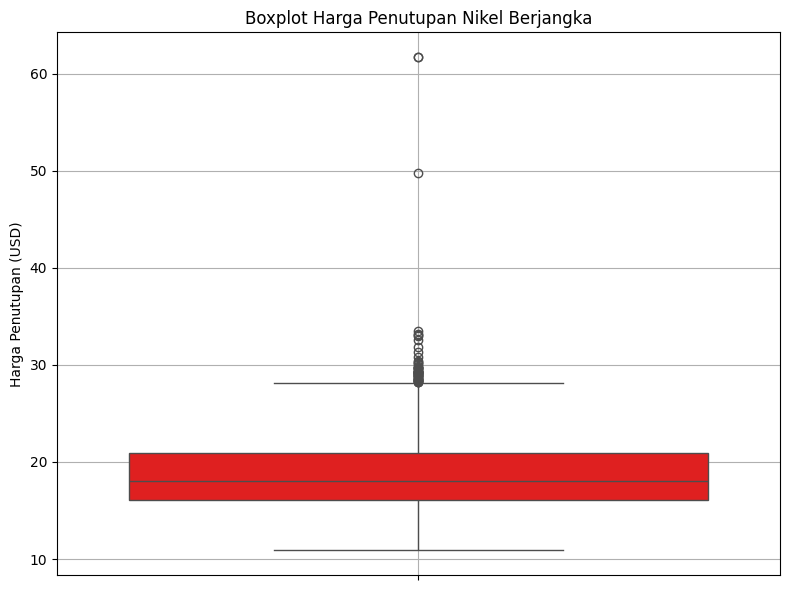

In [16]:
# prompt: tampilkan boxplot, warna merah

import matplotlib.pyplot as plt
# Boxplot untuk kolom 'Terakhir'
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['Terakhir'], color='red')
plt.title('Boxplot Harga Penutupan Nikel Berjangka')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan boxplot yang  tampilkan untuk **Harga Penutupan Nikel Berjangka**, berikut makna dari grafik tersebut:

---

 📌 **Makna dan Interpretasi Boxplot**

1. **Kotak (Box berwarna merah)**:

   * Menunjukkan **interkuartil range (IQR)** yaitu rentang dari kuartil 1 (Q1, 25%) hingga kuartil 3 (Q3, 75%).
   * Artinya, **50% data harga nikel** berada dalam rentang ini.

2. **Garis dalam kotak (median)**:

   * Menunjukkan **nilai tengah (median)** dari data.
   * Dalam grafik ini, median terlihat berada di sekitar **18 USD**, artinya separuh dari data berada di bawah nilai ini.

3. **Garis horizontal ("whisker") di atas dan bawah kotak**:

   * Menunjukkan batas data yang masih dianggap **tidak outlier**.
   * Whisker atas berakhir sekitar **28 USD**, sedangkan whisker bawah sekitar **11 USD**.

4. **Titik-titik di atas whisker (outlier)**:

   * Merupakan **outlier**, yaitu nilai-nilai ekstrem yang lebih besar dari Q3 + 1.5×IQR atau lebih kecil dari Q1 – 1.5×IQR.
   * Dalam grafikmu, terdapat **banyak outlier di atas**, termasuk harga-harga di atas **30 USD**, bahkan ada yang mencapai **lebih dari 60 USD**.

---

#### 🎯 **Kesimpulan dari Grafik Ini:**

* Harga penutupan nikel umumnya berada di kisaran **11–28 USD**, dengan konsentrasi terbesar antara **16–21 USD**.
* Terdapat **banyak outlier ke atas**, artinya kadang-kadang terjadi lonjakan harga yang signifikan.
* Harga di atas 30 USD tergolong **tidak umum**, dan bisa disebabkan oleh peristiwa pasar tertentu seperti **krisis, permintaan tinggi, atau gangguan pasokan**.

---

### 🛠️ Rekomendasi:

Jika kamu menggunakan **GRU**, kamu **tidak wajib menghapus outlier**, tapi bisa:

* **Skalakan data** dengan `MinMaxScaler` (agar outlier tidak mendominasi).
* Atau, buat dua versi: dengan dan tanpa outlier, lalu bandingkan performa model.




Outlier pada data time series seperti harga penutupan nikel berjangka sebaiknya tidak langsung dihapus karena sering kali mencerminkan peristiwa penting di dunia nyata. Harga yang melonjak tajam atau turun drastis bisa terjadi akibat krisis global, lonjakan permintaan industri, gangguan pasokan, atau perubahan kebijakan ekonomi. Jika outlier dihapus begitu saja, informasi penting yang mencerminkan dinamika pasar bisa hilang, sehingga model menjadi kurang akurat dalam menangkap pola perubahan yang sebenarnya. Selain itu, model deep learning seperti GRU pada dasarnya cukup fleksibel dan mampu belajar dari pola ekstrem selama data telah dinormalisasi dengan baik. Menghapus outlier juga dapat menyebabkan distorsi distribusi data, membuat model menjadi underfitting, dan gagal mengenali sinyal penting. Oleh karena itu, kecuali outlier tersebut terbukti merupakan kesalahan pencatatan atau sangat tidak relevan, sebaiknya tidak dihapus. Pendekatan yang lebih tepat adalah melakukan scaling agar nilai ekstrem tidak mendominasi pelatihan model, atau menerapkan teknik seperti winsorizing jika diperlukan. Dengan mempertahankan outlier yang valid, model memiliki peluang lebih besar untuk memahami kondisi pasar secara menyeluruh dan menghasilkan prediksi yang lebih akurat.


## 4.Interpolasi Linear Data

In [21]:
def interpolate_linear_manual_clean(df, column_name, decimals=3):
    """
    Interpolasi linear manual + isi NaN awal/akhir + pembulatan.

    Args:
        df (pd.DataFrame): DataFrame sumber.
        column_name (str): Kolom yang akan diinterpolasi.
        decimals (int): Jumlah desimal untuk pembulatan.

    Returns:
        pd.DataFrame: DataFrame dengan kolom terisi penuh dan rapi.
    """
    df = df.copy()
    values = df[column_name].values
    x = np.arange(len(values))

    for i in range(len(values)):
        if np.isnan(values[i]):
            x0 = i - 1
            while x0 >= 0 and np.isnan(values[x0]):
                x0 -= 1
            x1 = i + 1
            while x1 < len(values) and np.isnan(values[x1]):
                x1 += 1
            if x0 >= 0 and x1 < len(values):
                y0 = values[x0]
                y1 = values[x1]
                xi = i
                yi = y0 + ((y1 - y0) / (x1 - x0)) * (xi - x0)
                values[i] = yi

    df[column_name] = values

    # Isi NaN awal/akhir jika masih ada
    df[column_name] = df[column_name].fillna(method='ffill').fillna(method='bfill')

    # Bulatkan
    df[column_name] = df[column_name].round(decimals)

    return df


In [22]:
data_interpolated = interpolate_linear_manual_clean(data, 'Terakhir')
print(data_interpolated.tail())

        Tanggal  Terakhir
1823 2024-12-27    15.297
1824 2024-12-28    15.348
1825 2024-12-29    15.399
1826 2024-12-30    15.450
1827 2024-12-31    15.450


<ipython-input-21-2647931744>:35: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column_name] = df[column_name].fillna(method='ffill').fillna(method='bfill')



import numpy as np
Mari kita jabarkan setiap nilai `x0`, `x`, dan `xi` dalam fungsi `interpolate_linear_manual_clean` khususnya pada bagian loop yang menangani nilai `NaN`:

1.  **`values = df[column_name].values`**:
    *   `values` adalah array NumPy yang berisi nilai dari kolom yang sedang diinterpolasi (`'Terakhir'`). Array ini merepresentasikan deret waktu dari harga penutupan.

2.  **`x = np.arange(len(values))`**:
    *   `x` adalah array NumPy yang berisi indeks dari array `values`.
    *   `x` akan terlihat seperti `[0, 1, 2, 3, ..., len(values)-1]`.
    *   Setiap elemen `x` merepresentasikan posisi (indeks waktu) dari nilai harga yang bersesuaian di array `values`.
    *   Dalam konteks interpolasi, `x` digunakan sebagai koordinat sumbu horizontal (seringkali merepresentasikan waktu atau urutan data).

3.  **`for i in range(len(values)):`**:
    *   Loop ini berjalan melalui setiap indeks `i` dari 0 hingga panjang `values` dikurangi 1.
    *   `i` adalah indeks dari elemen saat ini yang sedang diperiksa di array `values`.

4.  **`if np.isnan(values[i]):`**:
    *   Kondisi ini memeriksa apakah nilai pada indeks `i` (yaitu `values[i]`) adalah `NaN` (nilai hilang). Jika ya, maka proses interpolasi untuk nilai ini akan dilakukan.

5.  **`x0 = i - 1`**:
    *   `x0` diinisialisasi sebagai indeks sebelum indeks `i` saat ini.
    *   Ini adalah titik awal pencarian nilai non-`NaN` ke arah kiri dari `i`.

6.  **`while x0 >= 0 and np.isnan(values[x0]): x0 -= 1`**:
    *   Loop ini mencari indeks `x0` yang valid ke arah kiri (mundur dari `i - 1`) yang **bukan** `NaN`.
    *   Pencarian berhenti ketika menemukan indeks `x0` yang `values[x0]` bukan `NaN` DAN `x0` masih dalam rentang indeks array (>= 0).
    *   Jika loop selesai, `x0` akan menjadi indeks dari titik data non-`NaN` terdekat di sebelah kiri `i`.
    *   Dalam konteks interpolasi, `x0` merepresentasikan koordinat x (indeks waktu) dari titik data pertama (xi = x0, yi = y0) yang digunakan untuk interpolasi.

7.  **`x1 = i + 1`**:
    *   `x1` diinisialisasi sebagai indeks setelah indeks `i` saat ini.
    *   Ini adalah titik awal pencarian nilai non-`NaN` ke arah kanan dari `i`.

8.  **`while x1 < len(values) and np.isnan(values[x1]): x1 += 1`**:
    *   Loop ini mencari indeks `x1` yang valid ke arah kanan (maju dari `i + 1`) yang **bukan** `NaN`.
    *   Pencarian berhenti ketika menemukan indeks `x1` yang `values[x1]` bukan `NaN` DAN `x1` masih dalam rentang indeks array (< `len(values)`).
    *   Jika loop selesai, `x1` akan menjadi indeks dari titik data non-`NaN` terdekat di sebelah kanan `i`.
    *   Dalam konteks interpolasi, `x1` merepresentasikan koordinat x (indeks waktu) dari titik data kedua (xi = x1, yi = y1) yang digunakan untuk interpolasi.

9.  **`if x0 >= 0 and x1 < len(values):`**:
    *   Kondisi ini memastikan bahwa titik data non-`NaN` di sebelah kiri (`x0`) dan di sebelah kanan (`x1`) dari `i` berhasil ditemukan dalam rentang data. Jika salah satunya tidak ditemukan (misalnya, `NaN` ada di awal atau akhir deret), maka interpolasi linear standar antara dua titik tidak dapat dilakukan di sini (nantinya ditangani oleh `fillna`).

10. **`y0 = values[x0]`**:
    *   `y0` adalah nilai harga (`values`) pada indeks `x0`. Ini adalah koordinat y dari titik data pertama.

11. **`y1 = values[x1]`**:
    *   `y1` adalah nilai harga (`values`) pada indeks `x1`. Ini adalah koordinat y dari titik data kedua.

12. **`xi = i`**:
    *   `xi` adalah indeks saat ini (`i`) di mana nilai `NaN` berada.
    *   Ini merepresentasikan koordinat x (indeks waktu) dari titik yang akan diinterpolasi.

13. **`yi = y0 + ((y1 - y0) / (x1 - x0)) * (xi - x0)`**:
    *   Ini adalah formula interpolasi linear.
    *   `((y1 - y0) / (x1 - x0))` adalah gradien (kemiringan) garis lurus antara titik `(x0, y0)` dan `(x1, y1)`.
    *   `(xi - x0)` adalah jarak horizontal dari titik pertama (`x0`) ke titik yang akan diinterpolasi (`xi`).
    *   `((y1 - y0) / (x1 - x0)) * (xi - x0)` adalah perubahan vertikal (`delta y`) dari `y0` ke titik yang diinterpolasi.
    *   `y0 + ...` adalah nilai y yang diinterpolasi (`yi`) pada koordinat x (`xi`), dihitung dengan menambahkan perubahan vertikal ke nilai `y0` awal.

14. **`values[i] = yi`**:
    *   Nilai `NaN` pada indeks `i` diganti dengan nilai `yi` yang baru diinterpolasi.

**Ringkasan Variabel dalam Konteks Interpolasi:**

*   **`x0`**: Indeks (posisi waktu) dari titik data non-`NaN` yang digunakan sebagai batas **kiri** untuk interpolasi.
*   **`x1`**: Indeks (posisi waktu) dari titik data non-`NaN` yang digunakan sebagai batas **kanan** untuk interpolasi.
*   **`xi`**: Indeks (posisi waktu) dari nilai `NaN` yang sedang diinterpolasi.
*   **`y0`**: Nilai data pada indeks `x0`.
*   **`y1`**: Nilai data pada indeks `x1`.
*   **`yi`**: Nilai data yang dihasilkan dari interpolasi linear pada indeks `xi`.

Dengan kata lain, fungsi ini mencari dua titik data valid terdekat (satu di kiri `NaN` dan satu di kanan `NaN`) pada garis waktu (`x0` dan `x1`), kemudian menghitung nilai yang seharusnya ada (`yi`) pada posisi `NaN` (`xi`) seolah-olah semua titik tersebut berada pada garis lurus.

## 5.grafik setelah interpolasi

### a.statistik data setelah

In [26]:
data_interpolated.describe()

,Tanggal,Terakhir
count,1828,1828.000000
mean,2022-07-01 12:00:00,19.391824
min,2019-12-31 00:00:00,10.880000
25%,2021-03-31 18:00:00,16.115750
50%,2022-07-01 12:00:00,18.323000
75%,2023-10-01 06:00:00,21.630750
max,2024-12-31 00:00:00,61.714000
std,NaN,5.439209


### b. missing value setelah

In [27]:
data_interpolated.isnull().sum()

,0
Tanggal,0
Terakhir,0


### c.grafik

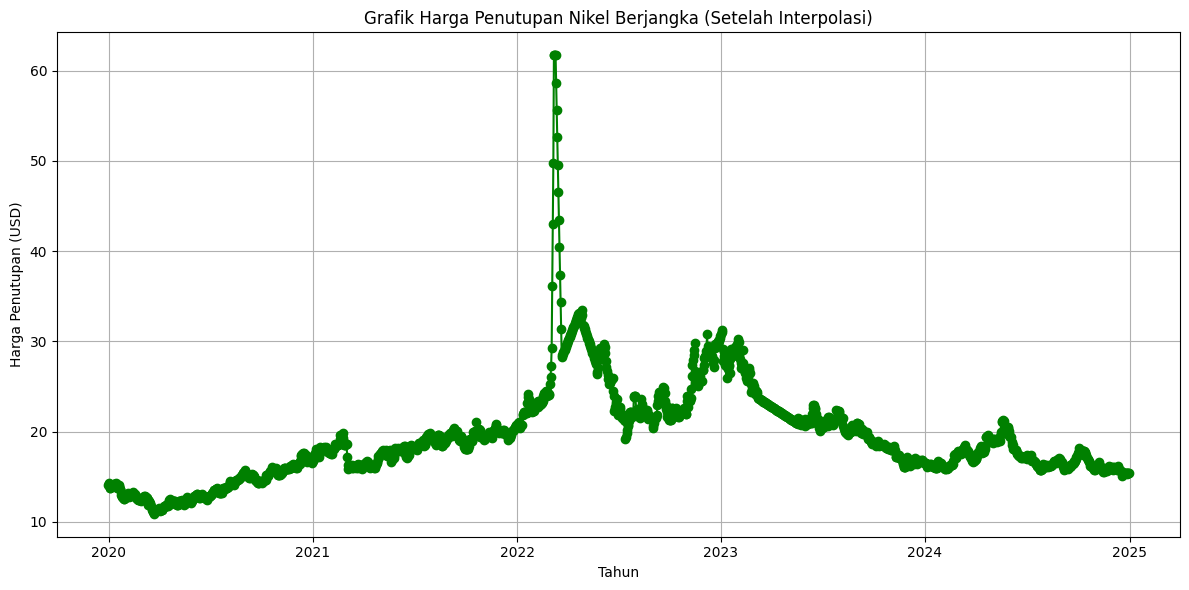

In [28]:
import matplotlib.pyplot as plt
# Visualisasi Data setelah interpolasi
plt.figure(figsize=(12, 6))
plt.plot(data_interpolated['Tanggal'], data_interpolated['Terakhir'], marker='o', linestyle='-', color='green')
plt.title('Grafik Harga Penutupan Nikel Berjangka (Setelah Interpolasi)')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

### d. Line Chart



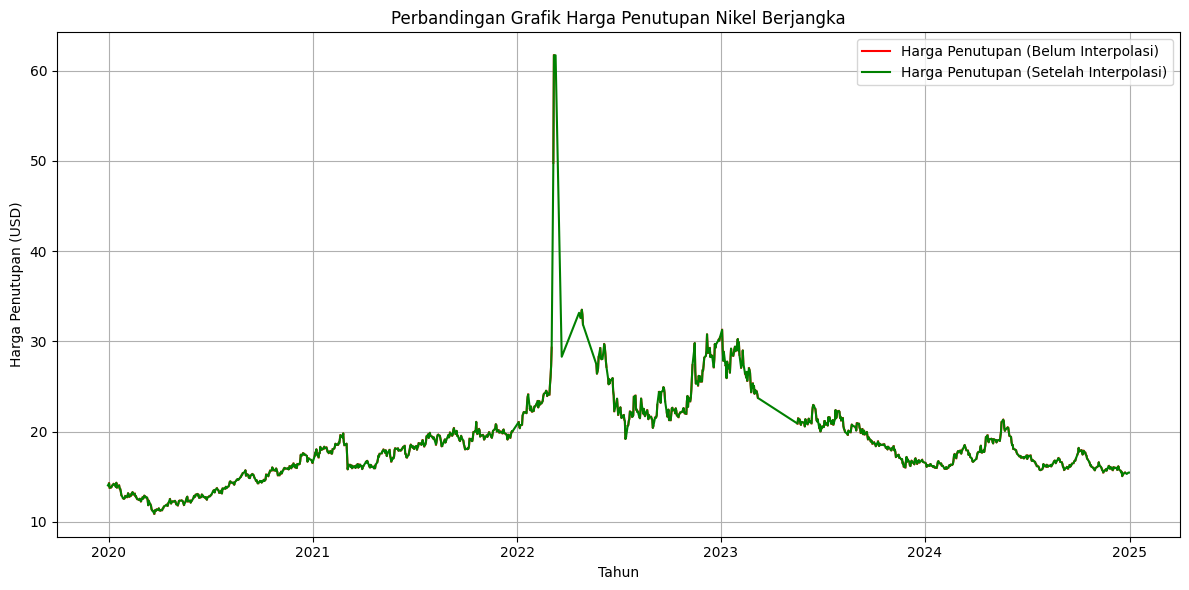

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(data['Tanggal'], data['Terakhir'], linestyle='-', color='red', label='Harga Penutupan (Belum Interpolasi)')
plt.plot(data_interpolated['Tanggal'], data_interpolated['Terakhir'], linestyle='-', color='green', label='Harga Penutupan (Setelah Interpolasi)')
plt.title('Perbandingan Grafik Harga Penutupan Nikel Berjangka')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### e. histogram

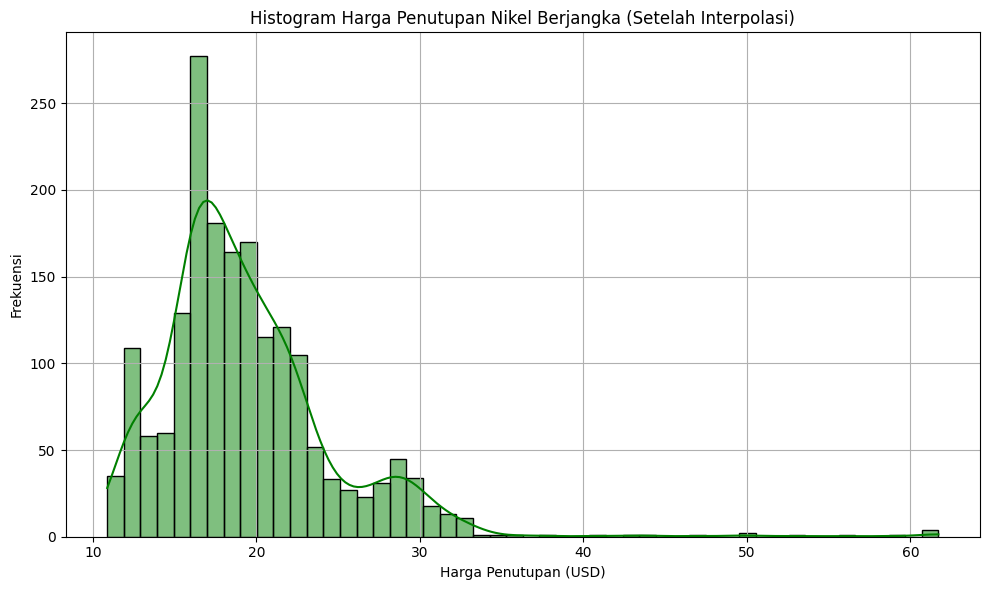

In [30]:
# Buat histogram untuk kolom 'Terakhir' setelah interpolasi
plt.figure(figsize=(10, 6))
sns.histplot(data_interpolated['Terakhir'], bins=50, kde=True, color='green')
plt.title('Histogram Harga Penutupan Nikel Berjangka (Setelah Interpolasi)')
plt.xlabel('Harga Penutupan (USD)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

### f. boxplot

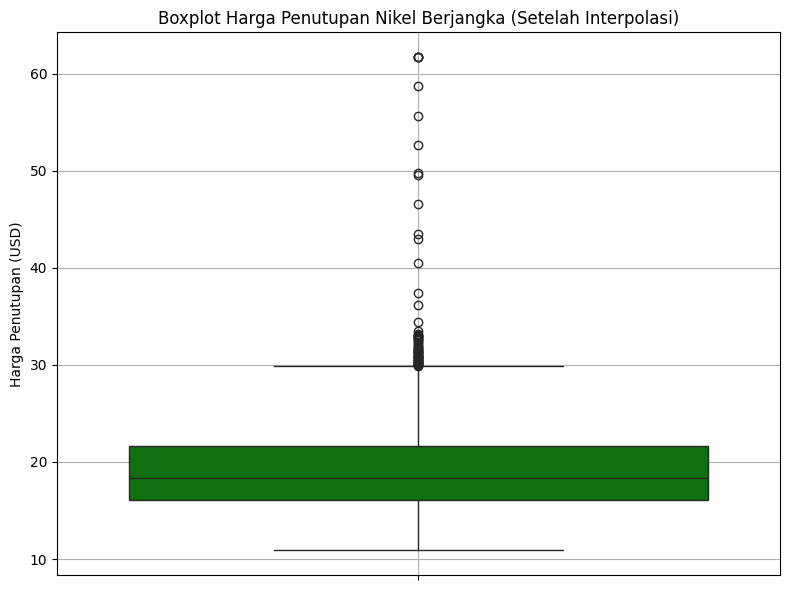

In [31]:
# Boxplot untuk kolom 'Terakhir' setelah interpolasi
plt.figure(figsize=(8, 6))
sns.boxplot(y=data_interpolated['Terakhir'], color='green')
plt.title('Boxplot Harga Penutupan Nikel Berjangka (Setelah Interpolasi)')
plt.ylabel('Harga Penutupan (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 5.Pembagian Data

In [32]:
def split_data_time_series(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Membagi data time series menjadi train, validation, dan test.

    Args:
        df (pd.DataFrame): DataFrame yang berisi data time series.
        train_ratio (float): Proporsi data training.
        val_ratio (float): Proporsi data validasi.
        test_ratio (float): Proporsi data testing.

    Returns:
        (pd.DataFrame, pd.DataFrame, pd.DataFrame): train, validation, test
    """
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Total rasio harus 1.0"

    n = len(df)
    train_end = int(train_ratio * n)
    val_end = train_end + int(val_ratio * n)

    train = df.iloc[:train_end]
    val = df.iloc[train_end:val_end]
    test = df.iloc[val_end:]

    return train, val, test


In [33]:
train_data, val_data, test_data = split_data_time_series(data_interpolated)

# Cek jumlah baris masing-masing
print(f"Train: {len(train_data)} baris")
print(f"Validasi: {len(val_data)} baris")
print(f"Test: {len(test_data)} baris")

Train: 1279 baris
Validasi: 274 baris
Test: 275 baris


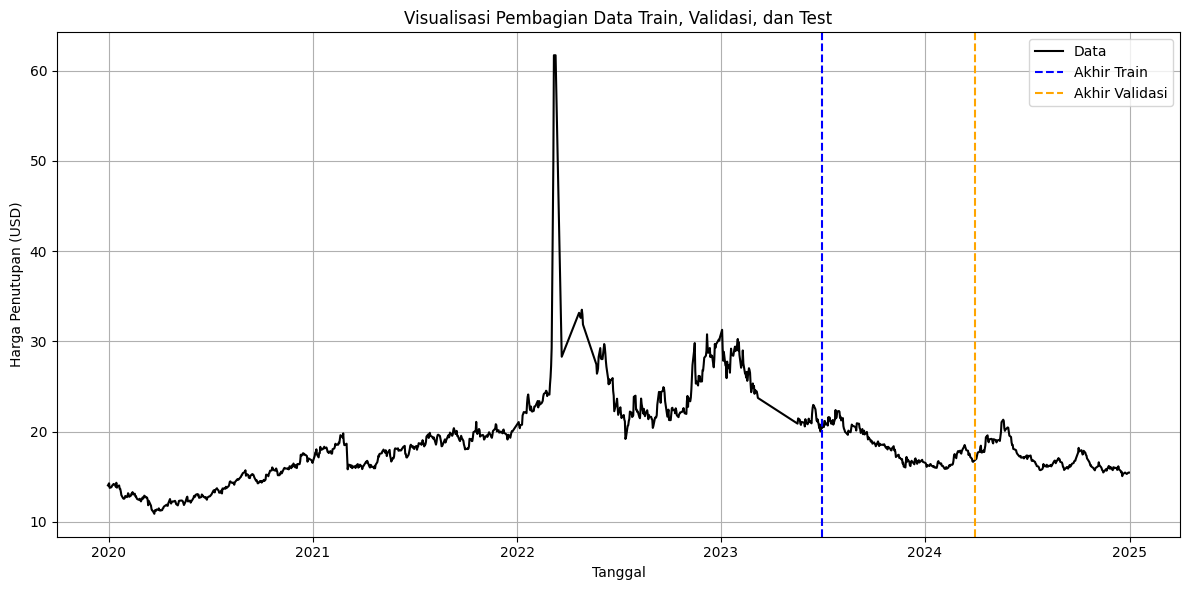

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(data_interpolated['Tanggal'], data_interpolated['Terakhir'], label='Data', color='black')
plt.axvline(train_data['Tanggal'].iloc[-1], color='blue', linestyle='--', label='Akhir Train')
plt.axvline(val_data['Tanggal'].iloc[-1], color='orange', linestyle='--', label='Akhir Validasi')
plt.title("Visualisasi Pembagian Data Train, Validasi, dan Test")
plt.xlabel("Tanggal")
plt.ylabel("Harga Penutupan (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##6. Normalisasi Data (Train)

In [45]:
import pandas as pd
import numpy as np

# Misal ini adalah data yang sudah dibagi sebelumnya
# train_data, val_data, test_data

# 1. Hitung min dan max dari data training
min_train = train_data['Terakhir'].min()
max_train = train_data['Terakhir'].max()

In [46]:
min_train

10.88

In [47]:
max_train

61.714

In [48]:
# 2. Fungsi normalisasi berdasarkan min-max dari training
def normalize_series(series, min_val, max_val):
    return (series - min_val) / (max_val - min_val)

In [49]:
# 3. Normalisasi tiap bagian dataset
train_data['Terakhir_Norm'] = normalize_series(train_data['Terakhir'], min_train, max_train)
val_data['Terakhir_Norm'] = normalize_series(val_data['Terakhir'], min_train, max_train)
test_data['Terakhir_Norm'] = normalize_series(test_data['Terakhir'], min_train, max_train)

<ipython-input-49-1819126177>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Terakhir_Norm'] = normalize_series(train_data['Terakhir'], min_train, max_train)
<ipython-input-49-1819126177>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['Terakhir_Norm'] = normalize_series(val_data['Terakhir'], min_train, max_train)
<ipython-input-49-1819126177>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [50]:
# Cek hasil normalisasi pada data training, validasi, dan testing
print("Data Training (Setelah Normalisasi):")
print(train_data[['Tanggal', 'Terakhir', 'Terakhir_Norm']].head())
print("\nData Validasi (Setelah Normalisasi):")
print(val_data[['Tanggal', 'Terakhir', 'Terakhir_Norm']].head())
print("\nData Testing (Setelah Normalisasi):")
print(test_data[['Tanggal', 'Terakhir', 'Terakhir_Norm']].head())

Data Training (Setelah Normalisasi):
     Tanggal  Terakhir  Terakhir_Norm
0 2019-12-31    14.025       0.061868
1 2020-01-01    14.142       0.064170
2 2020-01-02    14.260       0.066491
3 2020-01-03    13.755       0.056557
4 2020-01-04    13.777       0.056989

Data Validasi (Setelah Normalisasi):
        Tanggal  Terakhir  Terakhir_Norm
1279 2023-07-02    20.508       0.189401
1280 2023-07-03    20.591       0.191034
1281 2023-07-04    20.489       0.189027
1282 2023-07-05    21.173       0.202483
1283 2023-07-06    21.148       0.201991

Data Testing (Setelah Normalisasi):
        Tanggal  Terakhir  Terakhir_Norm
1553 2024-04-01    16.924       0.118897
1554 2024-04-02    16.980       0.119998
1555 2024-04-03    17.264       0.125585
1556 2024-04-04    17.597       0.132136
1557 2024-04-05    17.697       0.134103


In [51]:
# Statistik deskriptif untuk data training
print("\nStatistik Deskriptif Data Training:")
print(train_data.describe())

# Statistik deskriptif untuk data validasi
print("\nStatistik Deskriptif Data Validasi:")
print(val_data.describe())

# Statistik deskriptif untuk data testing
print("\nStatistik Deskriptif Data Testing:")
print(test_data.describe())


Statistik Deskriptif Data Training:
                   Tanggal     Terakhir  Terakhir_Norm
count                 1279  1279.000000    1279.000000
mean   2021-09-30 00:00:00    20.130688       0.181978
min    2019-12-31 00:00:00    10.880000       0.000000
25%    2020-11-14 12:00:00    15.893500       0.098625
50%    2021-09-30 00:00:00    19.512000       0.169808
75%    2022-08-15 12:00:00    22.830000       0.235079
max    2023-07-01 00:00:00    61.714000       1.000000
std                    NaN     6.261603       0.123177

Statistik Deskriptif Data Validasi:
                   Tanggal    Terakhir  Terakhir_Norm
count                  274  274.000000     274.000000
mean   2023-11-15 12:00:00   18.247708       0.144937
min    2023-07-02 00:00:00   15.851000       0.097789
25%    2023-09-08 06:00:00   16.627500       0.113064
50%    2023-11-15 12:00:00   17.910500       0.138303
75%    2024-01-22 18:00:00   19.895500       0.177352
max    2024-03-31 00:00:00   22.385000       0.226325

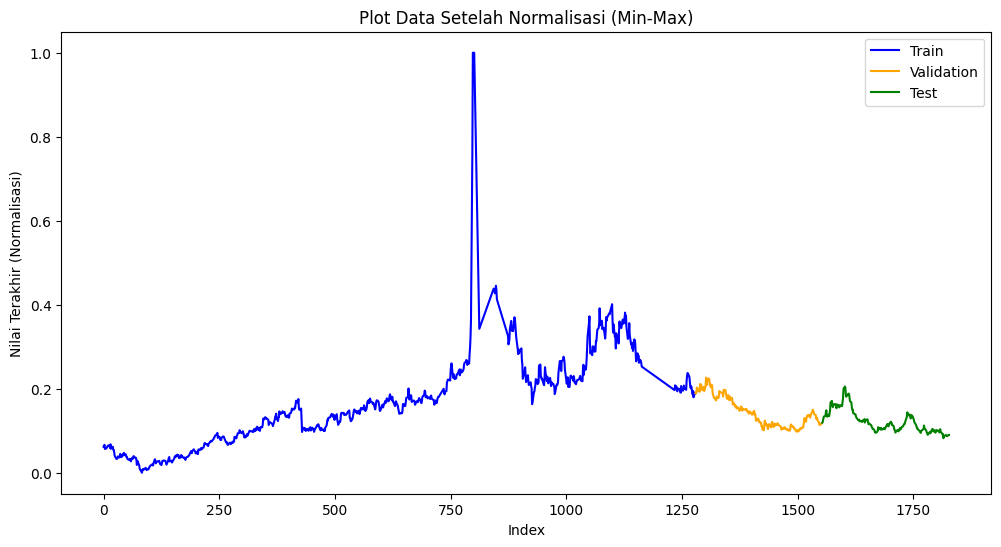

In [52]:
# Plot hasil normalisasi
plt.figure(figsize=(12,6))

# Plot train
plt.plot(train_data.index, train_data['Terakhir_Norm'], label='Train', color='blue')

# Plot validasi
plt.plot(val_data.index, val_data['Terakhir_Norm'], label='Validation', color='orange')

# Plot test
plt.plot(test_data.index, test_data['Terakhir_Norm'], label='Test', color='green')

plt.title('Plot Data Setelah Normalisasi (Min-Max)')
plt.xlabel('Index')
plt.ylabel('Nilai Terakhir (Normalisasi)')
plt.legend()
plt.show()

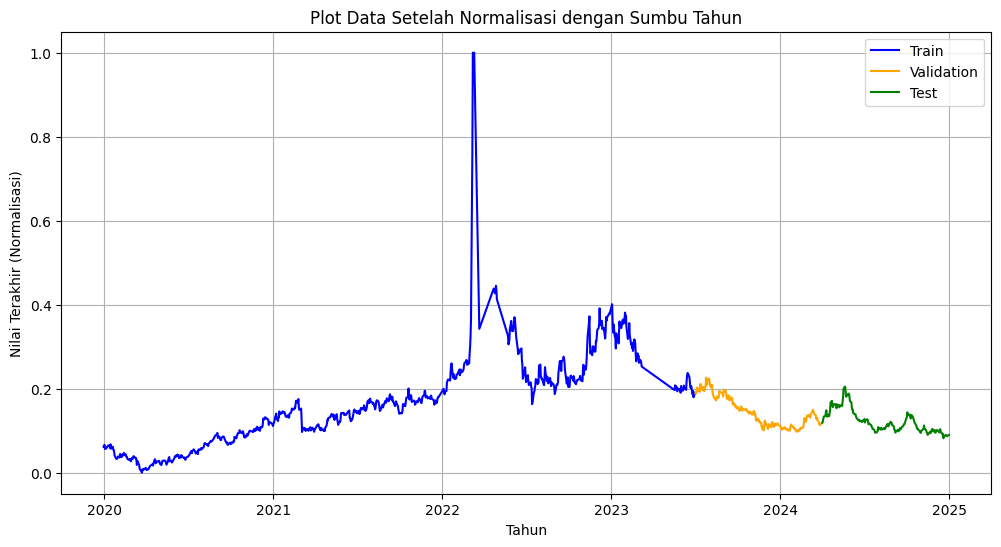

In [53]:
import matplotlib.pyplot as plt

# Misal kolom tahun ada di setiap dataset, pastikan tipe data sudah datetime atau string tahun
# Kalau belum datetime, bisa di-convert, misal:
# train_data['Tanggal'] = pd.to_datetime(train_data['Tanggal'])

plt.figure(figsize=(12,6))

# Plot train
plt.plot(train_data['Tanggal'], train_data['Terakhir_Norm'], label='Train', color='blue')

# Plot validasi
plt.plot(val_data['Tanggal'], val_data['Terakhir_Norm'], label='Validation', color='orange')

# Plot test
plt.plot(test_data['Tanggal'], test_data['Terakhir_Norm'], label='Test', color='green')

plt.title('Plot Data Setelah Normalisasi dengan Sumbu Tahun')
plt.xlabel('Tahun')
plt.ylabel('Nilai Terakhir (Normalisasi)')
plt.legend()
plt.grid(True)
plt.show()


#Bangun Model GRU

In [85]:
# ============================
# 📌 1️⃣ Import Library
# ============================
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, RNN, Dropout, Dense, Layer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [88]:
# ============================
# 📌 2️⃣ Atur Random Seed (agar hasil stabil)
# ============================
seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [106]:
# ============================
# 📌 3️⃣ Definisikan Custom GRU Cell Manual
# ============================
class CustomGRUCell(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(CustomGRUCell, self).__init__(**kwargs)
        self.units = units
        self.state_size = units  # ✅ ini kuncinya
        self.output_size = units

    def build(self, input_shape):
        input_dim = input_shape[-1]

        self.W_z = self.add_weight(shape=(input_dim, self.units),
                                    initializer="glorot_uniform", name="W_z")
        self.U_z = self.add_weight(shape=(self.units, self.units),
                                    initializer="glorot_uniform", name="U_z")
        self.b_z = self.add_weight(shape=(self.units,), initializer="zeros", name="b_z")

        self.W_r = self.add_weight(shape=(input_dim, self.units),
                                    initializer="glorot_uniform", name="W_r")
        self.U_r = self.add_weight(shape=(self.units, self.units),
                                    initializer="glorot_uniform", name="U_r")
        self.b_r = self.add_weight(shape=(self.units,), initializer="zeros", name="b_r")

        self.W_h = self.add_weight(shape=(input_dim, self.units),
                                    initializer="glorot_uniform", name="W_h")
        self.U_h = self.add_weight(shape=(self.units, self.units),
                                    initializer="glorot_uniform", name="U_h")
        self.b_h = self.add_weight(shape=(self.units,), initializer="zeros", name="b_h")

        super(CustomGRUCell, self).build(input_shape)

    def call(self, inputs, states):
        h_prev = states[0]

        z = tf.keras.activations.sigmoid(tf.matmul(inputs, self.W_z) + tf.matmul(h_prev, self.U_z) + self.b_z)
        r = tf.keras.activations.sigmoid(tf.matmul(inputs, self.W_r) + tf.matmul(h_prev, self.U_r) + self.b_r)
        h_tilde = tf.keras.activations.tanh(tf.matmul(inputs, self.W_h) + tf.matmul(r * h_prev, self.U_h) + self.b_h)
        h = (1 - z) * h_prev + z * h_tilde

        return h, [h]


In [107]:
# 📌 4️⃣ Fungsi Build Model Manual GRU
# ============================
def build_custom_gru_model(units, learning_rate, input_shape):
    inputs = Input(shape=input_shape)
    gru_layer = RNN(CustomGRUCell(units))(inputs)
    dropout = Dropout(0.2)(gru_layer)
    output = Dense(1)(dropout)

    model = Model(inputs=inputs, outputs=output)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')
    return model

In [111]:
# ============================
# 📌 5️⃣ Siapkan Data Sequence
# (Asumsikan Anda sudah punya: train_data, val_data, lookback)
# ============================
def create_sequences(data, lookback=10):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

In [112]:
# 4️⃣ Persiapan data
lookback = 10
train_values = train_data['Terakhir_Norm'].values.astype(np.float32)
val_values = val_data['Terakhir_Norm'].values.astype(np.float32)

X_train, y_train = create_sequences(train_values, lookback)
X_val, y_val = create_sequences(val_values, lookback)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

In [113]:
train_values

array([0.06186804, 0.06416965, 0.06649093, ..., 0.19052209, 0.18615493,
       0.18776803], dtype=float32)

In [114]:
X_train

array([[[0.06186804],
        [0.06416965],
        [0.06649093],
        ...,
        [0.06009757],
        [0.06235984],
        [0.06304836]],

       [[0.06416965],
        [0.06649093],
        [0.05655663],
        ...,
        [0.06235984],
        [0.06304836],
        [0.0651139 ]],

       [[0.06649093],
        [0.05655663],
        [0.05698942],
        ...,
        [0.06304836],
        [0.0651139 ],
        [0.0644844 ]],

       ...,

       [[0.22789866],
        [0.21723649],
        [0.20403667],
        ...,
        [0.18643034],
        [0.19459417],
        [0.17962387]],

       [[0.21723649],
        [0.20403667],
        [0.2013613 ],
        ...,
        [0.19459417],
        [0.17962387],
        [0.19052209]],

       [[0.20403667],
        [0.2013613 ],
        [0.2058268 ],
        ...,
        [0.17962387],
        [0.19052209],
        [0.18615493]]], dtype=float32)

## gridsearch

In [116]:
units_list = [32, 64, 128]
learning_rate_list = [0.001, 0.01,0.1]
batch_size_list = [16, 32, 64]
epochs_list = [50, 100, 150]

results = []

In [117]:
# 📌 7️⃣ Grid Search Loop
# ============================
for units in units_list:
    for lr in learning_rate_list:
        for batch_size in batch_size_list:
            for epochs in epochs_list:
                print(f"Training units={units}, lr={lr}, batch_size={batch_size}, epochs={epochs}")
                model = build_custom_gru_model(units, lr, input_shape=(lookback, 1))
                model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

                y_pred = model.predict(X_val, verbose=0).flatten()

                mse = mean_squared_error(y_val, y_pred)
                rmse = np.sqrt(mse)
                mape = mean_absolute_percentage_error(y_val, y_pred) * 100

                results.append({
                    'Units': units,
                    'Learning Rate': lr,
                    'Batch Size': batch_size,
                    'Epochs': epochs,
                    'MSE': mse,
                    'RMSE': rmse,
                    'MAPE (%)': mape
                })

Training units=32, lr=0.001, batch_size=16, epochs=50
Training units=32, lr=0.001, batch_size=16, epochs=100
Training units=32, lr=0.001, batch_size=16, epochs=150
Training units=32, lr=0.001, batch_size=32, epochs=50
Training units=32, lr=0.001, batch_size=32, epochs=100
Training units=32, lr=0.001, batch_size=32, epochs=150
Training units=32, lr=0.001, batch_size=64, epochs=50
Training units=32, lr=0.001, batch_size=64, epochs=100
Training units=32, lr=0.001, batch_size=64, epochs=150
Training units=32, lr=0.01, batch_size=16, epochs=50
Training units=32, lr=0.01, batch_size=16, epochs=100
Training units=32, lr=0.01, batch_size=16, epochs=150
Training units=32, lr=0.01, batch_size=32, epochs=50
Training units=32, lr=0.01, batch_size=32, epochs=100
Training units=32, lr=0.01, batch_size=32, epochs=150
Training units=32, lr=0.01, batch_size=64, epochs=50
Training units=32, lr=0.01, batch_size=64, epochs=100
Training units=32, lr=0.01, batch_size=64, epochs=150
Training units=32, lr=0.1

In [128]:
# 📌 8️⃣ Simpan Hasil Grid Search
# ============================
results_df = pd.DataFrame(results)

min_mse = results_df['MSE'].min()
min_rmse = results_df['RMSE'].min()
min_mape = results_df['MAPE (%)'].min()

def mark_best(val, best_val):
    return '✅' if np.isclose(val, best_val) else ''

results_df['Best MSE'] = results_df['MSE'].apply(lambda x: mark_best(x, min_mse))
results_df['Best RMSE'] = results_df['RMSE'].apply(lambda x: mark_best(x, min_rmse))
results_df['Best MAPE'] = results_df['MAPE (%)'].apply(lambda x: mark_best(x, min_mape))

results_df[['MSE', 'RMSE', 'MAPE (%)']] = results_df[['MSE', 'RMSE', 'MAPE (%)']].round(5)
results_df.to_csv("hasil_grid_search_custom_gru.csv", index=False)

# Tambahkan bagian ini untuk menampilkan hasil ke console
print("\n=== Hasil Grid Search ===")
print(results_df.to_string(index=False))



=== Hasil Grid Search ===
 Units  Learning Rate  Batch Size  Epochs     MSE    RMSE  MAPE (%) Best MSE Best RMSE Best MAPE
    32          0.001          16      50 0.00003 0.00589   3.42217                             
    32          0.001          16     100 0.00003 0.00564   2.98872                             
    32          0.001          16     150 0.00003 0.00551   2.85539                             
    32          0.001          32      50 0.00005 0.00680   3.66726                             
    32          0.001          32     100 0.00003 0.00567   2.91471                             
    32          0.001          32     150 0.00003 0.00526   2.64905                             
    32          0.001          64      50 0.00003 0.00570   3.10424                             
    32          0.001          64     100 0.00003 0.00584   3.07988                             
    32          0.001          64     150 0.00003 0.00549   2.90914                             
   

In [138]:
# Hitung masing-masing best value
min_mse = results_df['MSE'].min()
min_rmse = results_df['RMSE'].min()
min_mape = results_df['MAPE (%)'].min()

# Tandai mana yang best di tiap metrik
results_df['Best MSE'] = results_df['MSE'].apply(lambda x: np.isclose(x, min_mse))
results_df['Best RMSE'] = results_df['RMSE'].apply(lambda x: np.isclose(x, min_rmse))
results_df['Best MAPE'] = results_df['MAPE (%)'].apply(lambda x: np.isclose(x, min_mape))

# Cari hanya baris yang memenuhi semua best metric
best_combination = results_df[
    (results_df['Best MSE']) &
    (results_df['Best RMSE']) &
    (results_df['Best MAPE'])
]

# Tampilkan hasil best combination (jika ada)
if not best_combination.empty:
    print("✅ Best Combination (semua metrik terbaik):")
    print(best_combination[['Units', 'Learning Rate', 'Batch Size', 'Epochs', 'MSE', 'RMSE', 'MAPE (%)']])
else:
    print("⚠️ Tidak ada satu kombinasi yang menang di semua metrik.")


⚠️ Tidak ada satu kombinasi yang menang di semua metrik.


In [150]:
min_mse

3e-05

## 3 kombinasi terbaik masing-masing MSE, RMSE, MAPE → Gabungkan → Hitung frekuensi → Ambil kombinasi yang paling sering muncul → Itulah best compromise-nya. (best compromise pilihan)

In [160]:
import pandas as pd
import numpy as np

# Misalnya results_df sudah ada (hasil dari proses Grid Search)

# Ambil 3 kombinasi terbaik berdasarkan nilai MSE terkecil
top_mse = results_df.nsmallest(3, 'MSE')

# Ambil 3 kombinasi terbaik berdasarkan nilai RMSE terkecil
top_rmse = results_df.nsmallest(3, 'RMSE')

# Ambil 3 kombinasi terbaik berdasarkan nilai MAPE terkecil
top_mape = results_df.nsmallest(3, 'MAPE (%)')

# Gabungkan semua kandidat terbaik dari ketiga metrik
semua_kandidat = pd.concat([top_mse, top_rmse, top_mape])

# Hilangkan duplikasi baris yang sama persis
kandidat_unik = semua_kandidat.drop_duplicates()

# Hitung frekuensi kemunculan setiap kombinasi parameter
frekuensi = semua_kandidat.value_counts(subset=['Units', 'Learning Rate', 'Batch Size', 'Epochs']).reset_index(name='Jumlah')

# Urutkan berdasarkan frekuensi kemunculan terbanyak
frekuensi_terurut = frekuensi.sort_values(by='Jumlah', ascending=False)

# Ambil kombinasi terbaik (yang paling sering muncul di top 3 semua metrik)
kombinasi_terbaik = frekuensi_terurut.iloc[0]

# Tampilkan hasil kombinasi terbaik secara kompromi
print("✅ Kombinasi terbaik berdasarkan 3 metrik evaluasi (MSE, RMSE, MAPE):")
print(f"Jumlah Unit: {kombinasi_terbaik['Units']}")
print(f"Learning Rate: {kombinasi_terbaik['Learning Rate']}")
print(f"Batch Size: {kombinasi_terbaik['Batch Size']}")
print(f"Jumlah Epoch: {kombinasi_terbaik['Epochs']}")
print(f"Frekuensi kemunculan dalam top 3: {kombinasi_terbaik['Jumlah']} kali")

# Tampilkan seluruh kandidat untuk dokumentasi
print("\nDaftar seluruh kandidat hasil voting kompromi:")
print(frekuensi_terurut)


✅ Kombinasi terbaik berdasarkan 3 metrik evaluasi (MSE, RMSE, MAPE):
Jumlah Unit: 64.0
Learning Rate: 0.001
Batch Size: 16.0
Jumlah Epoch: 150.0
Frekuensi kemunculan dalam top 3: 2.0 kali

Daftar seluruh kandidat hasil voting kompromi:
   Units  Learning Rate  Batch Size  Epochs  Jumlah
0     64          0.001          16     150       2
1     32          0.001          16      50       1
2     32          0.001          16     150       1
3     32          0.001          16     100       1
4     64          0.001          16      50       1
5    128          0.001          16     150       1
6    128          0.001          32     100       1
7    128          0.001          64     150       1


## top mape

In [142]:
top_mape

,Units,Learning Rate,Batch Size,Epochs,MSE,RMSE,MAPE (%),Best MSE,Best RMSE,Best MAPE,total_rank
29,64,0.001,16,150,0.00003,0.00513,2.39282,True,False,True,19.5
58,128,0.001,32,100,0.00003,0.00513,2.43266,True,False,False,20.5
56,128,0.001,16,150,0.00003,0.00526,2.45913,True,False,False,27.5


##top mse

In [143]:
top_mse

,Units,Learning Rate,Batch Size,Epochs,MSE,RMSE,MAPE (%),Best MSE,Best RMSE,Best MAPE,total_rank
0,32,0.001,16,50,0.00003,0.00589,3.42217,True,False,False,78.0
1,32,0.001,16,100,0.00003,0.00564,2.98872,True,False,False,58.0
2,32,0.001,16,150,0.00003,0.00551,2.85539,True,False,False,50.0


##top rmse

In [144]:
top_rmse

,Units,Learning Rate,Batch Size,Epochs,MSE,RMSE,MAPE (%),Best MSE,Best RMSE,Best MAPE,total_rank
62,128,0.001,64,150,0.00003,0.00510,2.51936,True,True,False,20.0
27,64,0.001,16,50,0.00003,0.00513,2.53198,True,False,False,24.5
29,64,0.001,16,150,0.00003,0.00513,2.39282,True,False,True,19.5


In [161]:
# Tambah presisi biar tidak bingung
results_df[['MSE', 'RMSE', 'MAPE (%)']] = results_df[['MSE', 'RMSE', 'MAPE (%)']].round(10)
results_df.to_csv("hasil_grid_search_custom_gru.csv", index=False)

In [162]:
# 📌 8️⃣ Seleksi Best Model MULTI-METRIC
results_df['total_rank'] = results_df['MSE'].rank() + results_df['RMSE'].rank() + results_df['MAPE (%)'].rank()
best_row = results_df.loc[results_df['total_rank'].idxmin()]
print("\nBest Hyperparameter Combination:")
print(best_row)



Best Hyperparameter Combination:
Units                 64
Learning Rate      0.001
Batch Size            16
Epochs               150
MSE              0.00003
RMSE             0.00513
MAPE (%)         2.39282
Best MSE            True
Best RMSE          False
Best MAPE           True
total_rank          19.5
Name: 29, dtype: object


# Model Terbaik Berdasarkan Masing-Masing Evaluasi

##mse

In [166]:
# 1️⃣ Model terbaik berdasarkan MSE
best_row_mse = results_df.loc[results_df['MSE'].idxmin()]
units_mse = int(best_row_mse['Units'])
lr_mse = float(best_row_mse['Learning Rate'])
batch_size_mse = int(best_row_mse['Batch Size'])
epochs_mse = int(best_row_mse['Epochs'])

model_mse = build_custom_gru_model(units_mse, lr_mse, input_shape=(lookback, 1))
print("\n=== Model Terbaik Berdasarkan MSE ===")
model_mse.summary()
history_mse = model_mse.fit(X_train, y_train, batch_size=batch_size_mse, epochs=epochs_mse, verbose=1)



=== Model Terbaik Berdasarkan MSE ===


Model: "functional_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_106 (InputLayer)    │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_102 (RNN)                   │ (None, 32)             │         3,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,297 (12.88 KB)

 Trainable params: 3,297 (12.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0220
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1709e-04
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3436e-04
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.0692e-04
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1897e-04
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1977e-04
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.1209e-04
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.0285e-04
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9471e-04
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0856e-04
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

In [167]:
best_row_mse

,0
Units,32
Learning Rate,0.001
Batch Size,16
Epochs,50
MSE,0.00003
RMSE,0.00589
MAPE (%),3.42217
Best MSE,True
Best RMSE,False
Best MAPE,False


## rmse

In [168]:
# 2️⃣ Model terbaik berdasarkan RMSE
best_row_rmse = results_df.loc[results_df['RMSE'].idxmin()]
units_rmse = int(best_row_rmse['Units'])
lr_rmse = float(best_row_rmse['Learning Rate'])
batch_size_rmse = int(best_row_rmse['Batch Size'])
epochs_rmse = int(best_row_rmse['Epochs'])

model_rmse = build_custom_gru_model(units_rmse, lr_rmse, input_shape=(lookback, 1))
print("\n=== Model Terbaik Berdasarkan RMSE ===")
model_rmse.summary()
history_rmse = model_rmse.fit(X_train, y_train, batch_size=batch_size_rmse, epochs=epochs_rmse, verbose=1)



=== Model Terbaik Berdasarkan RMSE ===


Model: "functional_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_107 (InputLayer)    │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_103 (RNN)                   │ (None, 128)            │        49,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,049 (195.50 KB)

 Trainable params: 50,049 (195.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - loss: 0.0111
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0020
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0011    
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0668e-04
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4248e-04
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5117e-04
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.6880e-04
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5555e-04
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8762e-04
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1951e-04
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3022e-04
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4185e-04
Epoch 13/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7386e-04
Epoch 14/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8229e-04
Epoch 15/150
20/20 ━━

In [169]:
best_row_rmse

,62
Units,128
Learning Rate,0.001
Batch Size,64
Epochs,150
MSE,0.00003
RMSE,0.0051
MAPE (%),2.51936
Best MSE,True
Best RMSE,True
Best MAPE,False


## mape

In [170]:
# 3️⃣ Model terbaik berdasarkan MAPE
best_row_mape = results_df.loc[results_df['MAPE (%)'].idxmin()]
units_mape = int(best_row_mape['Units'])
lr_mape = float(best_row_mape['Learning Rate'])
batch_size_mape = int(best_row_mape['Batch Size'])
epochs_mape = int(best_row_mape['Epochs'])

model_mape = build_custom_gru_model(units_mape, lr_mape, input_shape=(lookback, 1))
print("\n=== Model Terbaik Berdasarkan MAPE ===")
model_mape.summary()
history_mape = model_mape.fit(X_train, y_train, batch_size=batch_size_mape, epochs=epochs_mape, verbose=1)


=== Model Terbaik Berdasarkan MAPE ===


Model: "functional_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_108 (InputLayer)    │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_104 (RNN)                   │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_104 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0146
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0010
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.9936e-04
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2031e-04
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6945e-04
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9587e-04
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.4824e-04
Epoch 9/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7569e-04
Epoch 10/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.0238e-04
Epoch 11/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2431e-04
Epoch 12/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8914e-04
Epoch 13/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0690e-04
Epoch 14/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7445e-04
Epoch 15/150
80/80 ━━━━━━━

In [171]:
best_row_mape

,29
Units,64
Learning Rate,0.001
Batch Size,16
Epochs,150
MSE,0.00003
RMSE,0.00513
MAPE (%),2.39282
Best MSE,True
Best RMSE,False
Best MAPE,True


# Model dengan Kombinasi Terbaik (Best Compromise)

In [172]:
# 4️⃣ Model Best Compromise
best_units = int(kombinasi_terbaik['Units'])
best_lr = float(kombinasi_terbaik['Learning Rate'])
best_batch_size = int(kombinasi_terbaik['Batch Size'])
best_epochs = int(kombinasi_terbaik['Epochs'])

best_model = build_custom_gru_model(best_units, best_lr, input_shape=(lookback, 1))
print("\n=== Model Terbaik Hasil Kompromi ===")
best_model.summary()
history_compromise = best_model.fit(X_train, y_train, batch_size=best_batch_size, epochs=best_epochs, verbose=1)


=== Model Terbaik Hasil Kompromi ===


Model: "functional_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_109 (InputLayer)    │ (None, 10, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_105 (RNN)                   │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,737 (49.75 KB)

 Trainable params: 12,737 (49.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0099
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.2011e-04
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4136e-04
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8366e-04
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9182e-04
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8250e-04
Epoch 9/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4256e-04
Epoch 10/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.0072e-04
Epoch 11/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.7078e-04
Epoch 12/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4111e-04
Epoch 13/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1823e-04
Epoch 14/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9691e-04
Epoch 15/150
80/80 ━━━━━━━

In [173]:
best_row

,29
Units,64
Learning Rate,0.001
Batch Size,16
Epochs,150
MSE,0.00003
RMSE,0.00513
MAPE (%),2.39282
Best MSE,True
Best RMSE,False
Best MAPE,True


## Grafik loss function masing-masing model terbaik

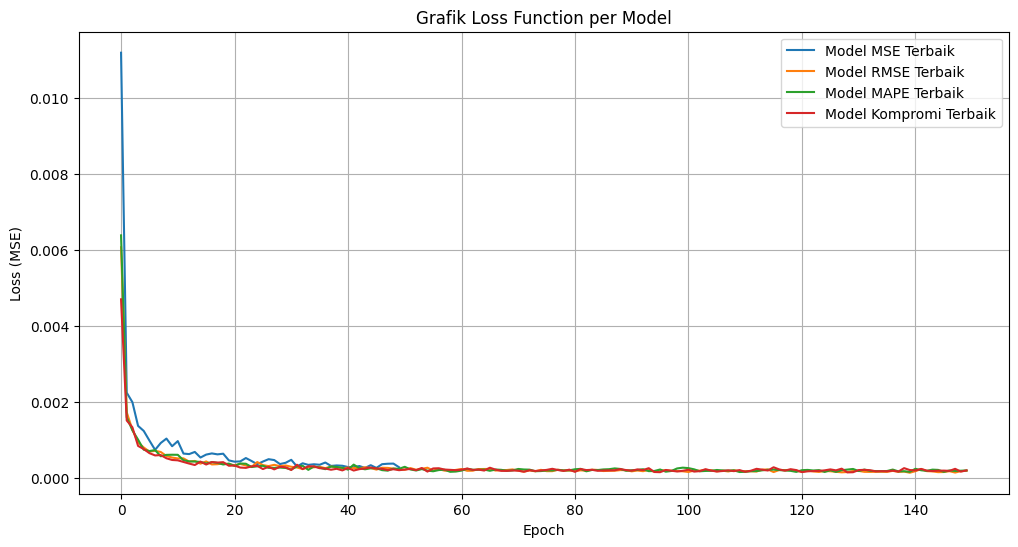

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history_mse.history['loss'], label='Model MSE Terbaik')
plt.plot(history_rmse.history['loss'], label='Model RMSE Terbaik')
plt.plot(history_mape.history['loss'], label='Model MAPE Terbaik')
plt.plot(history_compromise.history['loss'], label='Model Kompromi Terbaik')
plt.title('Grafik Loss Function per Model')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()


## mse

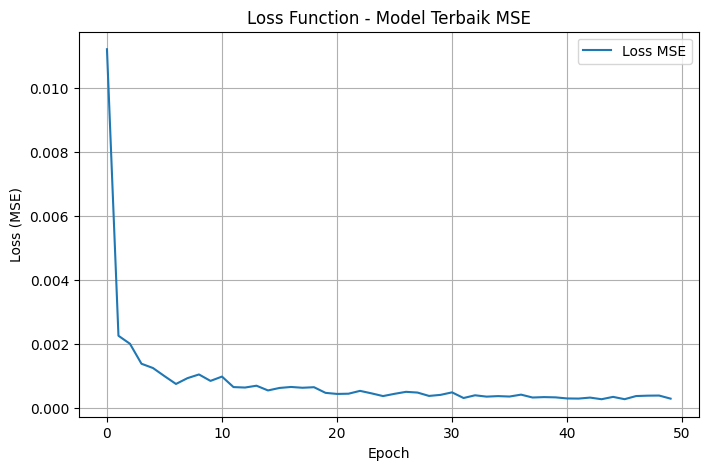

In [175]:
# 1️⃣ Grafik Loss Model MSE
plt.figure(figsize=(8, 5))
plt.plot(history_mse.history['loss'], label='Loss MSE')
plt.title('Loss Function - Model Terbaik MSE')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## rmse

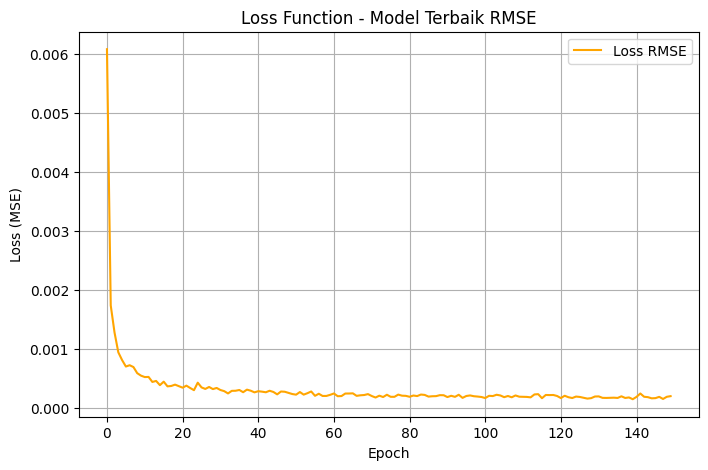

In [176]:
# 2️⃣ Grafik Loss Model RMSE
plt.figure(figsize=(8, 5))
plt.plot(history_rmse.history['loss'], label='Loss RMSE', color='orange')
plt.title('Loss Function - Model Terbaik RMSE')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## mape

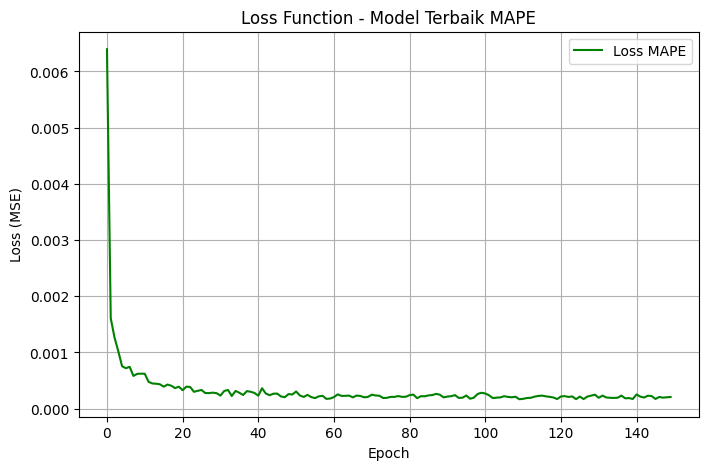

In [177]:
# 3️⃣ Grafik Loss Model MAPE
plt.figure(figsize=(8, 5))
plt.plot(history_mape.history['loss'], label='Loss MAPE', color='green')
plt.title('Loss Function - Model Terbaik MAPE')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

## Model Best Compromise

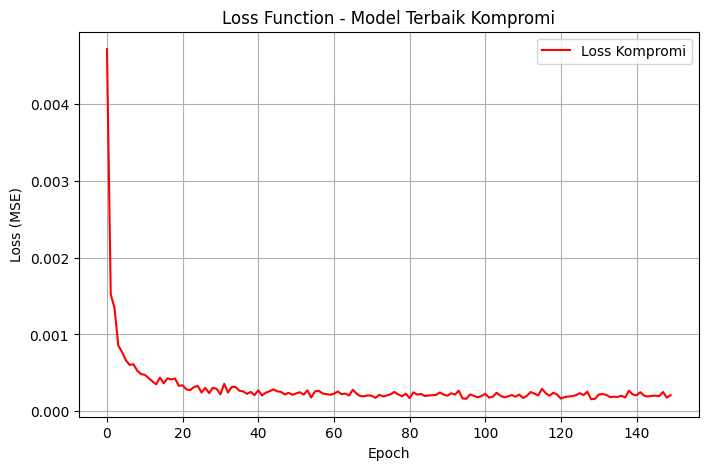

In [178]:
# 4️⃣ Grafik Loss Model Best Compromise
plt.figure(figsize=(8, 5))
plt.plot(history_compromise.history['loss'], label='Loss Kompromi', color='red')
plt.title('Loss Function - Model Terbaik Kompromi')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

# Pengujian Model

In [182]:
# Fungsi membuat sequence (sama seperti sebelumnya)
def create_sequences_for_test(data_series, lookback):
    X, y = [], []
    for i in range(len(data_series) - lookback):
        X.append(data_series[i:i+lookback])
        y.append(data_series[i+lookback])
    return np.array(X), np.array(y)

In [184]:
# Siapkan data test dalam bentuk array
test_series = test_data['Terakhir_Norm'].values

In [187]:
test_series

array([0.1188968 , 0.11999843, 0.12558524, 0.13213597, 0.13410316,
       0.13447692, 0.13485069, 0.13524413, 0.14435221, 0.14858166,
       0.13388677, 0.13363103, 0.1351261 , 0.13662116, 0.13813589,
       0.13461463, 0.14126372, 0.14893575, 0.16699453, 0.16835189,
       0.16970925, 0.17106661, 0.15985364, 0.15599795, 0.16140772,
       0.16278475, 0.16300114, 0.16319786, 0.16341425, 0.16280442,
       0.15637172, 0.15347995, 0.16264705, 0.16207656, 0.16150608,
       0.16093559, 0.16038478, 0.15564386, 0.15983397, 0.1600897 ,
       0.1604438 , 0.16077822, 0.16113231, 0.1588307 , 0.16882402,
       0.17854192, 0.19980722, 0.20159736, 0.2033875 , 0.20519731,
       0.20254161, 0.18656805, 0.18098123, 0.1837353 , 0.18487626,
       0.1860369 , 0.18717787, 0.18833851, 0.18768934, 0.17974191,
       0.17039777, 0.16945352, 0.16850927, 0.16758469, 0.15548649,
       0.14995869, 0.15031278, 0.14157847, 0.14110635, 0.14063422,
       0.1401621 , 0.13906047, 0.13874572, 0.13353267, 0.13099

In [188]:
# Buat sequence untuk data uji
X_test, y_test = create_sequences_for_test(test_series, lookback)

In [189]:
# Ubah bentuk X_test sesuai input GRU (samples, timesteps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## mse

In [245]:
y_pred_norm_mse = model_mse.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [246]:
# Evaluasi model terbaik berdasar mape (pakai normalized values)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_mse = mean_squared_error(y_test, y_pred_mse)
rmse_mse= np.sqrt(mse)
mape_mse = np.mean(np.abs((y_test - y_pred_mse) / y_test)) * 100

print(f"Hasil Evaluasi (Data Uji - Normalized):")
print(f"MSE  : {mse_mse}")
print(f"RMSE : {rmse_mse}")
print(f"MAPE : {mape_mse}%")

Hasil Evaluasi (Data Uji - Normalized):
MSE  : 2.1159320456007848e-05
RMSE : 883.4991805937963
MAPE : 24.30536687496635%


In [247]:
# Denormalisasi untuk kebutuhan grafik
y_pred_mse_denorm = inverse_normalize(y_pred_norm_mse, min_train, max_train)
y_actual_mse_denorm = inverse_normalize(y_test, min_train, max_train)

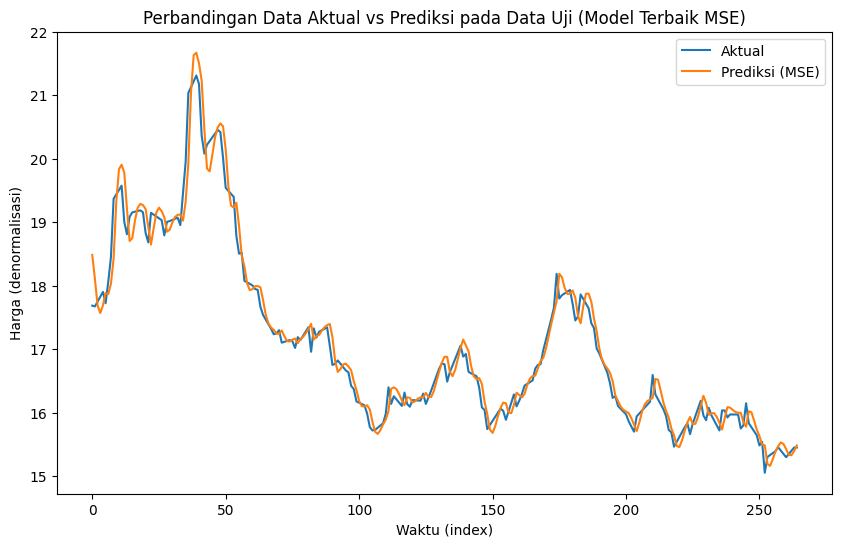

In [248]:
# Plot aktual vs prediksi
plt.figure(figsize=(10,6))
plt.plot(y_actual_mse_denorm, label='Aktual')
plt.plot(y_pred_mse_denorm, label='Prediksi (MSE)')
plt.title("Perbandingan Data Aktual vs Prediksi pada Data Uji (Model Terbaik MSE)")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()
plt.show()

##rmse

In [232]:
y_pred_norm_rmse = model_rmse.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [233]:
# Evaluasi model (pakai normalized values)
mse_rmse = mean_squared_error(y_test, y_pred_norm_rmse)
rmse_rmse = np.sqrt(mse_rmse)
mape_rmse = np.mean(np.abs((y_test - y_pred_norm_rmse) / y_test)) * 100

print(f"\nHasil Evaluasi Model RMSE (Data Uji - Normalized):")
print(f"MSE  : {mse_rmse}")
print(f"RMSE : {rmse_rmse}")
print(f"MAPE : {mape_rmse}%")


Hasil Evaluasi Model RMSE (Data Uji - Normalized):
MSE  : 2.4328891016772813e-05
RMSE : 0.0049324325658616774
MAPE : 24.181527429914414%


In [234]:
# Denormalisasi untuk kebutuhan grafik
y_pred_rmse_denorm = inverse_normalize(y_pred_norm_rmse, min_train, max_train)
y_actual_rmse_denorm = inverse_normalize(y_test, min_train, max_train)

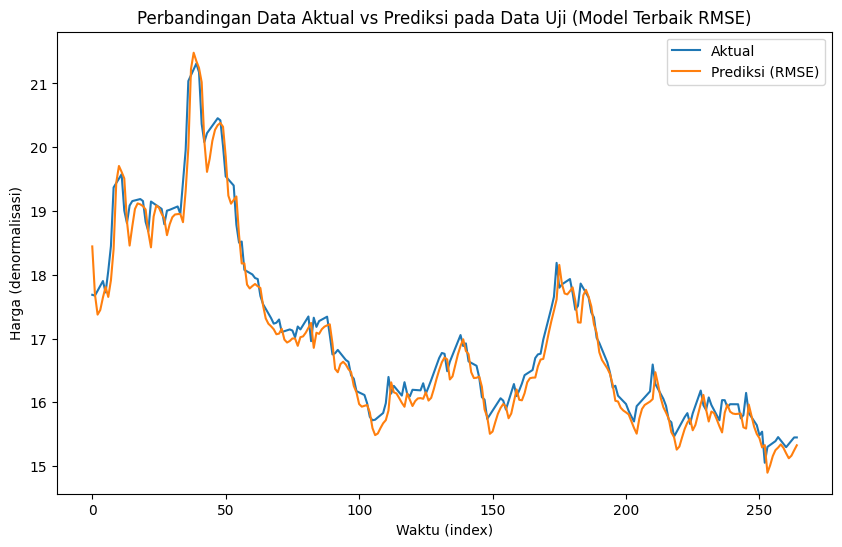

In [235]:
# Denormalisasi untuk kebutuhan grafik
y_pred_rmse_denorm = inverse_normalize(y_pred_norm_rmse, min_train, max_train)
y_actual_rmse_denorm = inverse_normalize(y_test, min_train, max_train)

# Plot aktual vs prediksi
plt.figure(figsize=(10,6))
plt.plot(y_actual_rmse_denorm, label='Aktual')
plt.plot(y_pred_rmse_denorm, label='Prediksi (RMSE)')
plt.title("Perbandingan Data Aktual vs Prediksi pada Data Uji (Model Terbaik RMSE)")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()
plt.show()

## mape

In [238]:
y_pred_norm_mape = model_mape.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [239]:
# Evaluasi model (pakai normalized values)
mse_mape = mean_squared_error(y_test, y_pred_norm_mape)
rmse_mape = np.sqrt(mse_mape)
mape_mape = np.mean(np.abs((y_test - y_pred_norm_mape) / y_test)) * 100

print(f"\nHasil Evaluasi Model MAPE (Data Uji - Normalized):")
print(f"MSE  : {mse_mape}")
print(f"RMSE : {rmse_mape}")
print(f"MAPE : {mape_mape}%")


Hasil Evaluasi Model MAPE (Data Uji - Normalized):
MSE  : 1.6964960390455238e-05
RMSE : 0.004118854257005853
MAPE : 24.270459970257154%


In [240]:
# Denormalisasi untuk kebutuhan grafik
y_pred_mape_denorm = inverse_normalize(y_pred_norm_mape, min_train, max_train)
y_actual_mape_denorm = inverse_normalize(y_test, min_train, max_train)

In [225]:
# Denormalisasi hasil prediksi dan data aktual untuk plotting
y_pred_mape_denorm = inverse_normalize(y_pred_mape, min_train, max_train)
y_actual_denorm = inverse_normalize(y_test, min_train, max_train)

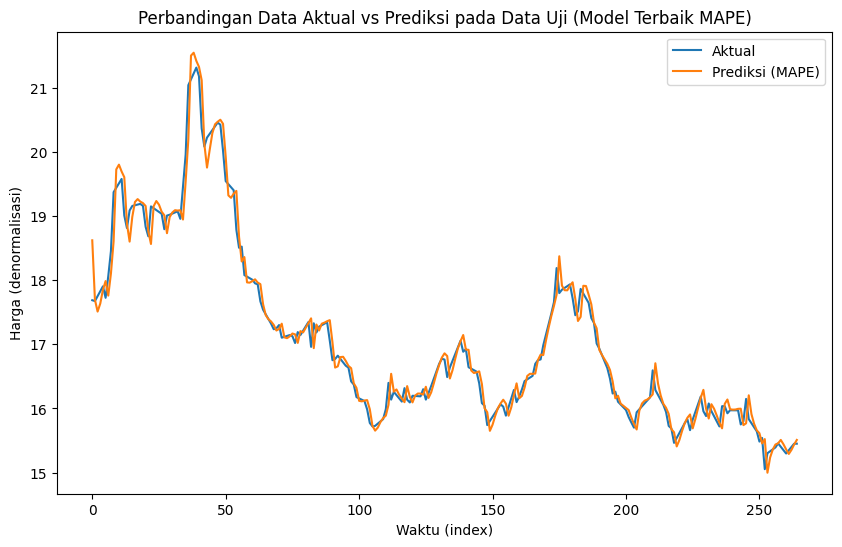

In [241]:
# Plot aktual vs prediksi
plt.figure(figsize=(10,6))
plt.plot(y_actual_mape_denorm, label='Aktual')
plt.plot(y_pred_mape_denorm, label='Prediksi (MAPE)')
plt.title("Perbandingan Data Aktual vs Prediksi pada Data Uji (Model Terbaik MAPE)")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()
plt.show()

## model best compromise

In [190]:
# Melakukan prediksi dengan model (misal: best_model dari hasil kompromi)
y_pred_norm = best_model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step


In [251]:
# Evaluasi model (pakai normalized values)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred_norm)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred_norm) / y_test)) * 100

print(f"Hasil Evaluasi (Data Uji - Normalized):")
print(f"MSE  : {mse}")
print(f"RMSE : {rmse}")
print(f"MAPE : {mape}%")

Hasil Evaluasi (Data Uji - Normalized):
MSE  : 1.791173573702169e-05
RMSE : 0.00423222586082332
MAPE : 23.80373446447037%


In [252]:
# Fungsi inverse normalization
def inverse_normalize(normalized_value, min_val, max_val):
    return normalized_value * (max_val - min_val) + min_val

In [253]:
# Denormalisasi untuk kebutuhan grafik
y_pred = inverse_normalize(y_pred_norm, min_train, max_train)
y_actual = inverse_normalize(y_test, min_train, max_train)


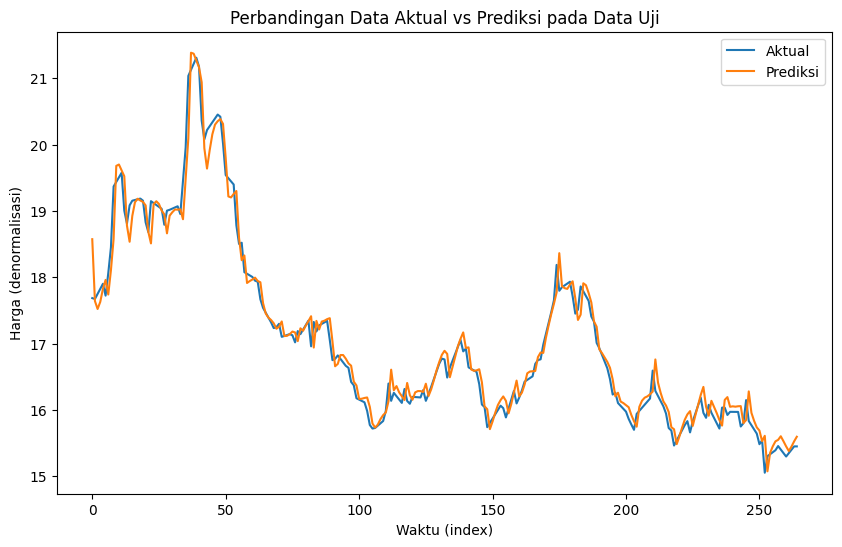

In [254]:
# Plot aktual vs prediksi
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_actual, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title("Perbandingan Data Aktual vs Prediksi pada Data Uji")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()
plt.show()

#4 grafik Model Terbaik

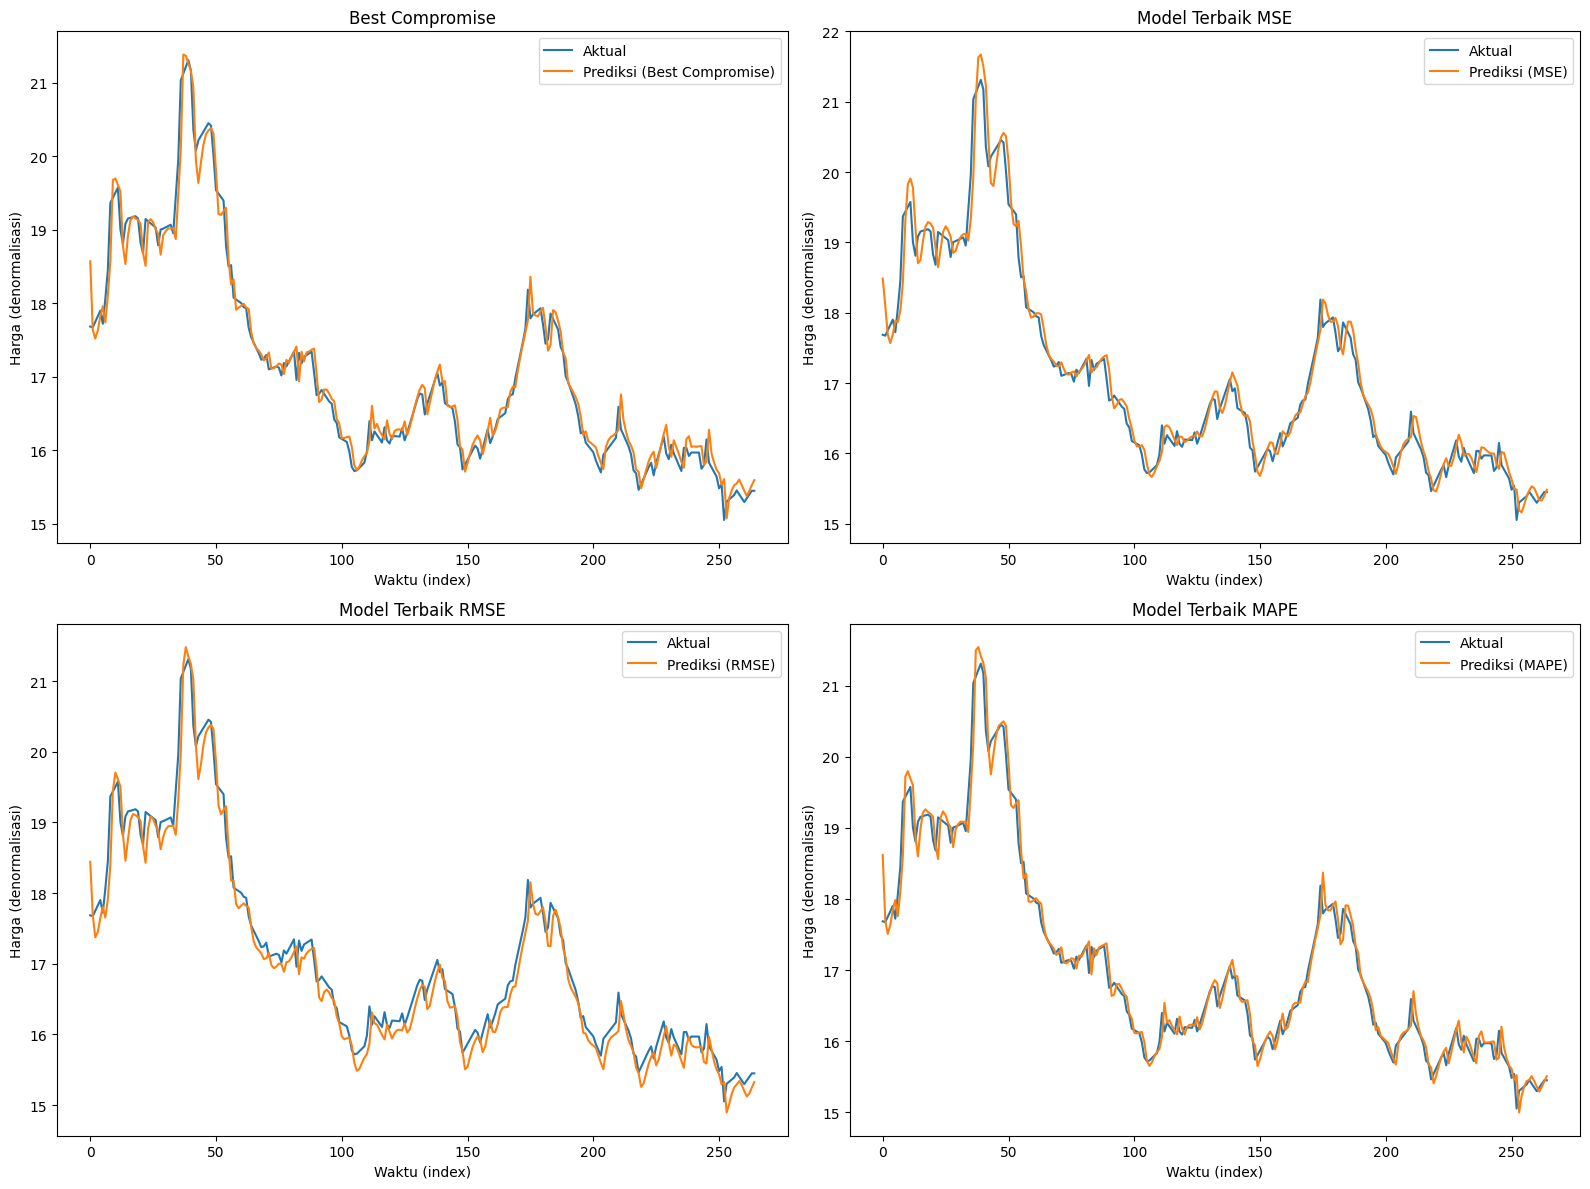

In [255]:
import matplotlib.pyplot as plt

# Membuat subplot 2x2
plt.figure(figsize=(16, 12))

# 1️⃣ Grafik Best Compromise
plt.subplot(2, 2, 1)
plt.plot(y_actual, label='Aktual')
plt.plot(y_pred, label='Prediksi (Best Compromise)')
plt.title("Best Compromise")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()

# 2️⃣ Grafik Model MSE
plt.subplot(2, 2, 2)
plt.plot(y_actual_mse_denorm, label='Aktual')
plt.plot(y_pred_mse_denorm, label='Prediksi (MSE)')
plt.title("Model Terbaik MSE")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()

# 3️⃣ Grafik Model RMSE
plt.subplot(2, 2, 3)
plt.plot(y_actual_rmse_denorm, label='Aktual')
plt.plot(y_pred_rmse_denorm, label='Prediksi (RMSE)')
plt.title("Model Terbaik RMSE")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()

# 4️⃣ Grafik Model MAPE
plt.subplot(2, 2, 4)
plt.plot(y_actual_mape_denorm, label='Aktual')
plt.plot(y_pred_mape_denorm, label='Prediksi (MAPE)')
plt.title("Model Terbaik MAPE")
plt.xlabel("Waktu (index)")
plt.ylabel("Harga (denormalisasi)")
plt.legend()

plt.tight_layout()
plt.show()


# tabel evaluasi komparatif semua model

In [257]:
import pandas as pd
import numpy as np

# Simpan hasil evaluasi semua model
hasil_evaluasi = {
    'Model': ['Best Compromise', 'MSE', 'RMSE', 'MAPE'],
    'MSE': [mse, mse_mse, mse_rmse, mse_mape],
    'RMSE': [rmse, rmse_mse, rmse_rmse, rmse_mape],
    'MAPE (%)': [mape, mape_mse, mape_rmse, mape_mape]
}

df_evaluasi = pd.DataFrame(hasil_evaluasi)

# Tampilkan tabel evaluasi
print("\n=== Tabel Evaluasi Semua Model (Data Uji) ===")
print(df_evaluasi)


=== Tabel Evaluasi Semua Model (Data Uji) ===
             Model       MSE        RMSE   MAPE (%)
0  Best Compromise  0.000018    0.004232  23.803734
1              MSE  0.000021  883.499181  24.305367
2             RMSE  0.000024    0.004932  24.181527
3             MAPE  0.000017    0.004119  24.270460


#Model Terbaik Data Uji

In [260]:
# Pilih model terbaik berdasarkan MAPE terkecil
model_terbaik_idx = df_evaluasi['MAPE (%)'].idxmin()
model_terbaik = df_evaluasi.loc[model_terbaik_idx]

print("✅ Model Terbaik Berdasarkan Evaluasi Data Uji (MAPE Terkecil):")
print(model_terbaik)

✅ Model Terbaik Berdasarkan Evaluasi Data Uji (MAPE Terkecil):
Model       Best Compromise
MSE                0.000018
RMSE               0.004232
MAPE (%)          23.803734
Name: 0, dtype: object


#Forecasting 1 Bulan (Tanpa denormalisasi)

      Tanggal  Forecast_Normalized
0  2025-01-01             0.090955
1  2025-01-02             0.091819
2  2025-01-03             0.092742
3  2025-01-04             0.093762
4  2025-01-05             0.094824
5  2025-01-06             0.095914
6  2025-01-07             0.097024
7  2025-01-08             0.098147
8  2025-01-09             0.099275
9  2025-01-10             0.100403
10 2025-01-11             0.101528
11 2025-01-12             0.102649
12 2025-01-13             0.103762
13 2025-01-14             0.104867
14 2025-01-15             0.105963
15 2025-01-16             0.107050
16 2025-01-17             0.108127
17 2025-01-18             0.109193
18 2025-01-19             0.110250
19 2025-01-20             0.111297
20 2025-01-21             0.112333
21 2025-01-22             0.113358
22 2025-01-23             0.114374
23 2025-01-24             0.115379
24 2025-01-25             0.116374
25 2025-01-26             0.117358
26 2025-01-27             0.118332
27 2025-01-28       

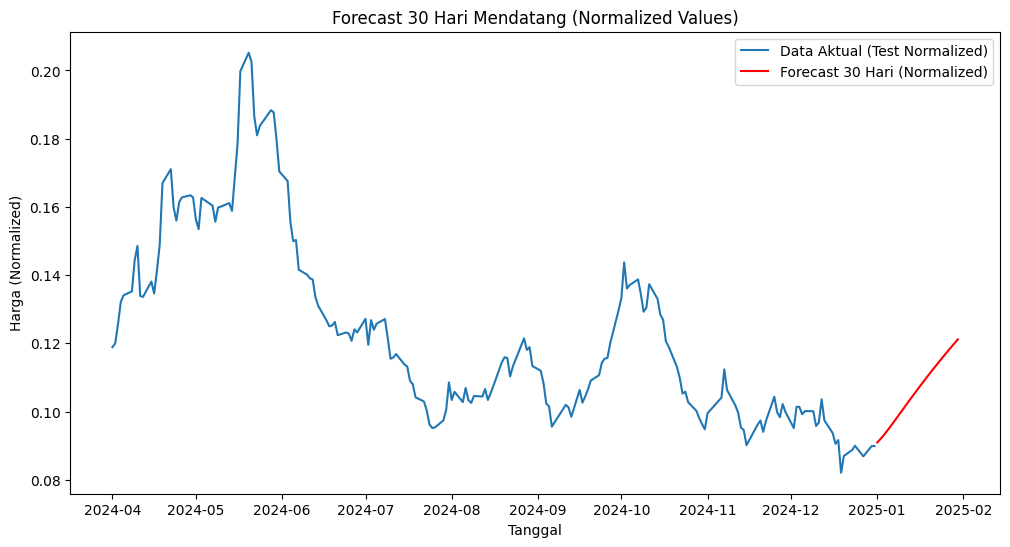

In [262]:
# Forecast langsung dengan normalized values
# Asumsi: model_mape (atau model terbaikmu) sudah ada

# Ambil data input terakhir dari data uji
last_sequence = test_data['Terakhir_Norm'].values[-lookback:]
forecast_input = last_sequence.reshape(1, lookback, 1)

# Forecast untuk 30 hari ke depan
forecast_horizon = 30
forecasted_norm = []

for _ in range(forecast_horizon):
    pred_norm = model_mape.predict(forecast_input, verbose=0)
    forecasted_norm.append(pred_norm[0,0])

    # Update input sequence dengan prediksi yang baru
    forecast_input = np.append(forecast_input[:,1:,:], [[[pred_norm[0,0]]]], axis=1)

# Hasil forecast masih dalam bentuk normalized
forecasted_norm = np.array(forecasted_norm)

# Buat index tanggal untuk 30 hari ke depan (opsional)
import pandas as pd

last_date = test_data['Tanggal'].iloc[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_horizon)

# Buat dataframe hasil forecast (masih normalized)
forecast_df_norm = pd.DataFrame({'Tanggal': forecast_dates, 'Forecast_Normalized': forecasted_norm})

# Tampilkan hasil forecast
print(forecast_df_norm)

# Visualisasi hasil normalized (opsional)
plt.figure(figsize=(12,6))
plt.plot(test_data['Tanggal'], test_data['Terakhir_Norm'], label='Data Aktual (Test Normalized)')
plt.plot(forecast_df_norm['Tanggal'], forecast_df_norm['Forecast_Normalized'], label='Forecast 30 Hari (Normalized)', color='red')
plt.title("Forecast 30 Hari Mendatang (Normalized Values)")
plt.xlabel("Tanggal")
plt.ylabel("Harga (Normalized)")
plt.legend()
plt.show()


🔎 Kenapa Forecast Tidak Harus Didenormalisasi (ketika model dilatih dengan data normalized)?
1️⃣ Model Belajar di Skala Normalized

Model GRU kamu selama training menerima data yang sudah dinormalisasi.

Output model (prediksi) juga otomatis berada dalam domain yang sama, yaitu skala normalisasi.

Selama kamu tetap menggunakan input normalized untuk forecasting, model tetap bekerja secara konsisten dalam domain 0-1.

2️⃣ Forecasting Sifatnya Iteratif

Forecast multi-step (misalnya 30 hari ke depan) biasanya dilakukan secara autoregressive, artinya:

Hasil prediksi hari ke-1 dipakai sebagai input untuk hari ke-2, dan seterusnya.

Karena semua hasilnya dalam bentuk normalized, aman digunakan sebagai input berulang.

3️⃣ Denormalisasi Hanya Dibutuhkan untuk Interpretasi

Denormalisasi diperlukan hanya saat kamu ingin menampilkan hasil prediksi dalam satuan aslinya (misalnya: harga nikel dalam USD).

Selama proses prediksi dan evaluasi internal model, tidak ada kewajiban untuk mengembalikan ke skala asli.

4️⃣ Konsistensi Domain Data

Model machine learning (terutama RNN, GRU, LSTM) sangat sensitif terhadap skala input.

Mengubah skala data selama proses forecasting (misal: mendadak denormalisasi dulu baru masukkan ke model) justru akan merusak hasil prediksi.

Karena itu, selama input & output tetap di domain normalized, model akan berjalan optimal.

🔬 Kesimpulan praktisnya di skripsimu:
"Forecast dilakukan dalam skala normalized untuk menjaga konsistensi domain input-output model. Denormalisasi hanya dilakukan pada tahap visualisasi atau interpretasi hasil."

#Perbandingan Proses data

In [212]:
# prompt: bandingkan data frame, data asli, data imputasi, data dinormalisasi (train, test, uji) dan data prediski dalam tabel bagian model dengan kombinasi terbaik berdasarkan best compromise

import pandas as pd
import numpy as np
# Buat DataFrame untuk perbandingan
perbandingan_df = pd.DataFrame({
    'Tahap Data': ['Data Asli', 'Data Imputasi', 'Data Normalisasi (Train)', 'Data Normalisasi (Test)', 'Data Normalisasi (Uji)'],
    'Jumlah Baris': [len(data), len(data_interpolated), len(train_data), len(val_data), len(test_data)],
    'Tanggal Mulai': [data['Tanggal'].iloc[0].strftime('%Y-%m-%d'), data_interpolated['Tanggal'].iloc[0].strftime('%Y-%m-%d'), train_data['Tanggal'].iloc[0].strftime('%Y-%m-%d'), val_data['Tanggal'].iloc[0].strftime('%Y-%m-%d'), test_data['Tanggal'].iloc[0].strftime('%Y-%m-%m')],
    'Tanggal Akhir': [data['Tanggal'].iloc[-1].strftime('%Y-%m-%d'), data_interpolated['Tanggal'].iloc[-1].strftime('%Y-%m-%d'), train_data['Tanggal'].iloc[-1].strftime('%Y-%m-%d'), val_data['Tanggal'].iloc[-1].strftime('%Y-%m-%d'), test_data['Tanggal'].iloc[-1].strftime('%Y-%m-%d')],
    'Kolom yang Digunakan': ["Tanggal, Terakhir", "Tanggal, Terakhir", "Tanggal, Terakhir, Terakhir_Norm", "Tanggal, Terakhir, Terakhir_Norm", "Tanggal, Terakhir, Terakhir_Norm"],
    'Missing Value (NaN)': [data['Terakhir'].isnull().sum(), data_interpolated['Terakhir'].isnull().sum(), train_data['Terakhir_Norm'].isnull().sum(), val_data['Terakhir_Norm'].isnull().sum(), test_data['Terakhir_Norm'].isnull().sum()],
    'Rentang Nilai (Terakhir)': [f"{data['Terakhir'].min():.2f} - {data['Terakhir'].max():.2f}", f"{data_interpolated['Terakhir'].min():.2f} - {data_interpolated['Terakhir'].max():.2f}", f"{train_data['Terakhir'].min():.2f} - {train_data['Terakhir'].max():.2f}", f"{val_data['Terakhir'].min():.2f} - {val_data['Terakhir'].max():.2f}", f"{test_data['Terakhir'].min():.2f} - {test_data['Terakhir'].max():.2f}"],
    'Rentang Nilai (Normalisasi)': ["-", "-", f"{train_data['Terakhir_Norm'].min():.2f} - {train_data['Terakhir_Norm'].max():.2f}", f"{val_data['Terakhir_Norm'].min():.2f} - {val_data['Terakhir_Norm'].max():.2f}", f"{test_data['Terakhir_Norm'].min():.2f} - {test_data['Terakhir_Norm'].max():.2f}"]
})

print("Tabel Perbandingan Tahap Data:")
print(perbandingan_df.to_string(index=False))

# DataFrame untuk perbandingan hasil model
hasil_model_df = pd.DataFrame({
    'Model': ['Best MSE', 'Best RMSE', 'Best MAPE', 'Best Compromise'],
    'Units': [units_mse, units_rmse, units_mape, best_units],
    'Learning Rate': [lr_mse, lr_rmse, lr_mape, best_lr],
    'Batch Size': [batch_size_mse, batch_size_rmse, batch_size_mape, best_batch_size],
    'Epochs': [epochs_mse, epochs_rmse, epochs_mape, best_epochs],
    'Test MSE (Normalized)': [
        mean_squared_error(y_test, model_mse.predict(X_test)),
        mean_squared_error(y_test, model_rmse.predict(X_test)),
        mean_squared_error(y_test, model_mape.predict(X_test)),
        mean_squared_error(y_test, best_model.predict(X_test))
    ],
    'Test RMSE (Normalized)': [
        np.sqrt(mean_squared_error(y_test, model_mse.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, model_rmse.predict(X_test))),
        np.sqrt(np.sqrt(mean_squared_error(y_test, model_mape.predict(X_test)))), # Corrected RMSE calculation
        np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))
    ],
     'Test MAPE (%) (Normalized)': [
        mean_absolute_percentage_error(y_test, model_mse.predict(X_test)) * 100,
        mean_absolute_percentage_error(y_test, model_rmse.predict(X_test)) * 100,
        mean_absolute_percentage_error(y_test, model_mape.predict(X_test)) * 100,
        mean_absolute_percentage_error(y_test, best_model.predict(X_test)) * 100
    ]
})

# Rounding hasil evaluasi
hasil_model_df[['Test MSE (Normalized)', 'Test RMSE (Normalized)', 'Test MAPE (%) (Normalized)']] = hasil_model_df[['Test MSE (Normalized)', 'Test RMSE (Normalized)', 'Test MAPE (%) (Normalized)']].round(5)


print("\nTabel Perbandingan Hasil Evaluasi Model pada Data Uji (Normalized):")
print(hasil_model_df.to_string(index=False))

# Tampilkan perbandingan Data Aktual vs Prediksi untuk Model Best Compromise
prediksi_compromise = pd.DataFrame({
    'Tanggal': test_data['Tanggal'].iloc[lookback:], # Tanggal dimulai setelah lookback
    'Aktual (Denormalized)': y_actual,
    'Prediksi (Denormalized)': y_pred,
    'Aktual (Normalized)': y_test,
    'Prediksi (Normalized)': y_pred_norm.flatten() # Pastikan flat
})

print("\nTabel Perbandingan Data Aktual vs Prediksi (Best Compromise Model - Data Uji):")
print(prediksi_compromise.head().to_string(index=False)) # Tampilkan beberapa baris awal
print("...")
print(prediksi_compromise.tail().to_string(index=False)) # Tampilkan beberapa baris akhir


Tabel Perbandingan Tahap Data:
              Tahap Data  Jumlah Baris Tanggal Mulai Tanggal Akhir             Kolom yang Digunakan  Missing Value (NaN) Rentang Nilai (Terakhir) Rentang Nilai (Normalisasi)
               Data Asli          1828    2019-12-31    2024-12-31                Tanggal, Terakhir                  659            10.88 - 61.71                           -
           Data Imputasi          1828    2019-12-31    2024-12-31                Tanggal, Terakhir                    0            10.88 - 61.71                           -
Data Normalisasi (Train)          1279    2019-12-31    2023-07-01 Tanggal, Terakhir, Terakhir_Norm                    0            10.88 - 61.71                 0.00 - 1.00
 Data Normalisasi (Test)           274    2023-07-02    2024-03-31 Tanggal, Terakhir, Terakhir_Norm                    0            15.85 - 22.39                 0.10 - 0.23
  Data Normalisasi (Uji)           275    2024-04-04    2024-12-31 Tanggal, Terakhir, Terakhir_Norm